# Library import

In [1]:
# data
import numpy as np
import pandas as pd

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set_style("whitegrid")

# display all columns
pd.set_option("display.max_columns", None)

# display all rows
pd.set_option("display.max_rows", None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# gdrive mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding

In [3]:
credit_data = pd.read_csv("/content/drive/MyDrive/Colab folders/dataset/loan_data_2007_2014.csv")
df_loans = credit_data.copy()
df_loans.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df_loans.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data preparation
Checking for any duplicated data, missing data, and to replace missing data before performing EDA

In [6]:
# dropping the duplicates
df_loans.drop_duplicates()

# display the data without the duplicates
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
# checking missing values
df_loans.isna().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [8]:
df_loans.isna().sum().sum()

9776227

In [9]:
total = df_loans.isnull().sum().sort_values(ascending = False)
percent = (df_loans.isnull().sum() / len(df_loans) * 100).sort_values(ascending= False)

applied_percent = percent.apply(lambda x: f"{int(x)} %")

missing_values = pd.concat([total, applied_percent], axis = 1, keys=['total missing values', 'percentage'])

missing_values.head(30)

,total missing values,percentage
inq_last_12m,466285,100 %
total_cu_tl,466285,100 %
open_acc_6m,466285,100 %
open_il_6m,466285,100 %
open_il_12m,466285,100 %
open_il_24m,466285,100 %
mths_since_rcnt_il,466285,100 %
total_bal_il,466285,100 %
annual_inc_joint,466285,100 %
verification_status_joint,466285,100 %


In [10]:
unsignificant_features = (percent > 45).sum()

print(f"number of features with more than 45% missing values: {unsignificant_features}")

number of features with more than 45% missing values: 22


## Dropping irrelevant features.
Features that have more than 45% missing values will be deleted since they have no significant information and incomplete data

In [11]:
# dropping features
percent_threshold = 45

columns_to_drop = percent[percent > percent_threshold].index

df_loans_cleaned = df_loans.drop(columns= columns_to_drop)

print(f"\nColumns dropped (>{percent_threshold}% missing values): {list(columns_to_drop)}")

print(f"\nShape of cleaned DataFrame: {df_loans_cleaned.shape}")


Columns dropped (>45% missing values): ['inq_last_12m', 'total_cu_tl', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'annual_inc_joint', 'verification_status_joint', 'dti_joint', 'il_util', 'open_rv_12m', 'all_util', 'inq_fi', 'max_bal_bc', 'open_rv_24m', 'mths_since_last_record', 'mths_since_last_major_derog', 'desc', 'mths_since_last_delinq', 'next_pymnt_d']

Shape of cleaned DataFrame: (466285, 53)


In [12]:
# checking for missing values once more

total = df_loans_cleaned.isnull().sum().sort_values(ascending = False)
percent = (df_loans_cleaned.isnull().sum() / len(df_loans_cleaned) * 100).sort_values(ascending= False)

applied_percent = percent.apply(lambda x: f"{int(x)} %")

missing_values = pd.concat([total, applied_percent], axis = 1, keys=['total missing values', 'percentage'])

missing_values.head(30)

,total missing values,percentage
tot_coll_amt,70276,15 %
tot_cur_bal,70276,15 %
total_rev_hi_lim,70276,15 %
emp_title,27588,5 %
emp_length,21008,4 %
last_pymnt_d,376,0 %
revol_util,340,0 %
collections_12_mths_ex_med,145,0 %
last_credit_pull_d,42,0 %
open_acc,29,0 %


In [13]:
df_loans_cleaned.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [14]:
df_loans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

Applying imputation techniques for rest of the missing values

*   Missing numerical values will be filled with mean of each column
*   Missing categorical values will be filled with modus of each column



In [15]:
# seperating numerical and categorical features
categorical_col = df_loans_cleaned.select_dtypes(include= object)
numerical_col = df_loans_cleaned.select_dtypes(exclude= object)

In [16]:
categorical_col.columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [17]:
numerical_col.columns.tolist()

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [18]:
# handling missing categorical values by filling them with mode of each column
for column in categorical_col:
  mode_value = df_loans_cleaned[column].mode()[0]
  df_loans_cleaned[column].fillna(mode_value, inplace= True)

In [19]:
# from sklearn.preprocessing import LabelEncoder
# # Apply Label Encoding per column
# label_encoders = {}  # Store encoders to ensure consistency

# for col in df_loans_cleaned.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     df_loans_cleaned[col] = le.fit_transform(df_loans_cleaned[col])
#     label_encoders[col] = le  # Save the encoder for potential inverse transformation

In [20]:
# handling missing numerical values by filling them with mean of each column
for column in numerical_col:
  mean_value = df_loans_cleaned[column].mean()
  df_loans_cleaned[column].fillna(mean_value, inplace= True)

In [21]:
# checking for missing values once more

total = df_loans_cleaned.isnull().sum().sort_values(ascending = False)
percent = (df_loans_cleaned.isnull().sum() / len(df_loans_cleaned) * 100).sort_values(ascending= False)

applied_percent = percent.apply(lambda x: f"{int(x)} %")

missing_values = pd.concat([total, applied_percent], axis = 1, keys=['total missing values', 'percentage'])

missing_values.head(30)

,total missing values,percentage
Unnamed: 0,0,0 %
id,0,0 %
member_id,0,0 %
loan_amnt,0,0 %
funded_amnt,0,0 %
funded_amnt_inv,0,0 %
term,0,0 %
int_rate,0,0 %
installment,0,0 %
grade,0,0 %


In [22]:
df_loans_cleaned.drop([
     "Unnamed: 0", "member_id", "url", "zip_code", "pymnt_plan", "initial_list_status"
  ], axis= 1, inplace=True)


In [23]:
df_loans_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771


In [24]:
df_loans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   loan_amnt                   466285 non-null  int64  
 2   funded_amnt                 466285 non-null  int64  
 3   funded_amnt_inv             466285 non-null  float64
 4   term                        466285 non-null  object 
 5   int_rate                    466285 non-null  float64
 6   installment                 466285 non-null  float64
 7   grade                       466285 non-null  object 
 8   sub_grade                   466285 non-null  object 
 9   emp_title                   466285 non-null  object 
 10  emp_length                  466285 non-null  object 
 11  home_ownership              466285 non-null  object 
 12  annual_inc                  466285 non-null  float64
 13  verification_s

# EDA (Exploratory Data Analysis)
**Feature selection**
- There are 22 features that have more than 45% missing values. This shows that the features have no significant information and incomplete data for representing the regarding features. With that being said, using **imputation** techniques to handle the big proportion of missing data would only result in inaccurate model
-  


# Univariate analysis

In [25]:
df_loans = df_loans_cleaned
df_loans.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,191.913517,138801.713385,30379.087771


In [26]:
df_loans.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
466280,8598660,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,debt_consolidation,Debt consolidation,TX,19.85,0.0,Apr-03,2.0,18.0,0.0,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,9684700,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,debt_consolidation,Debt consolidation,TN,18.45,0.0,Jun-97,5.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,9584776,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,debt_consolidation,Debt consolidation,OH,25.65,0.0,Dec-01,2.0,18.0,0.0,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,9604874,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,credit_card,Credit card refinancing,CA,5.39,3.0,Feb-03,1.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,Apr-15,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0
466284,9199665,10000,10000,9975.0,36 months,19.20,367.58,D,D3,Teacher,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,other,Other,CA,22.78,1.0,Feb-00,0.0,6.0,0.0,11325,70.8,22.0,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,57477.0,16000.0


In [27]:
df_loans.nunique()

,0
id,466285
loan_amnt,1352
funded_amnt,1354
funded_amnt_inv,9854
term,2
int_rate,506
installment,55622
grade,7
sub_grade,35
emp_title,205475


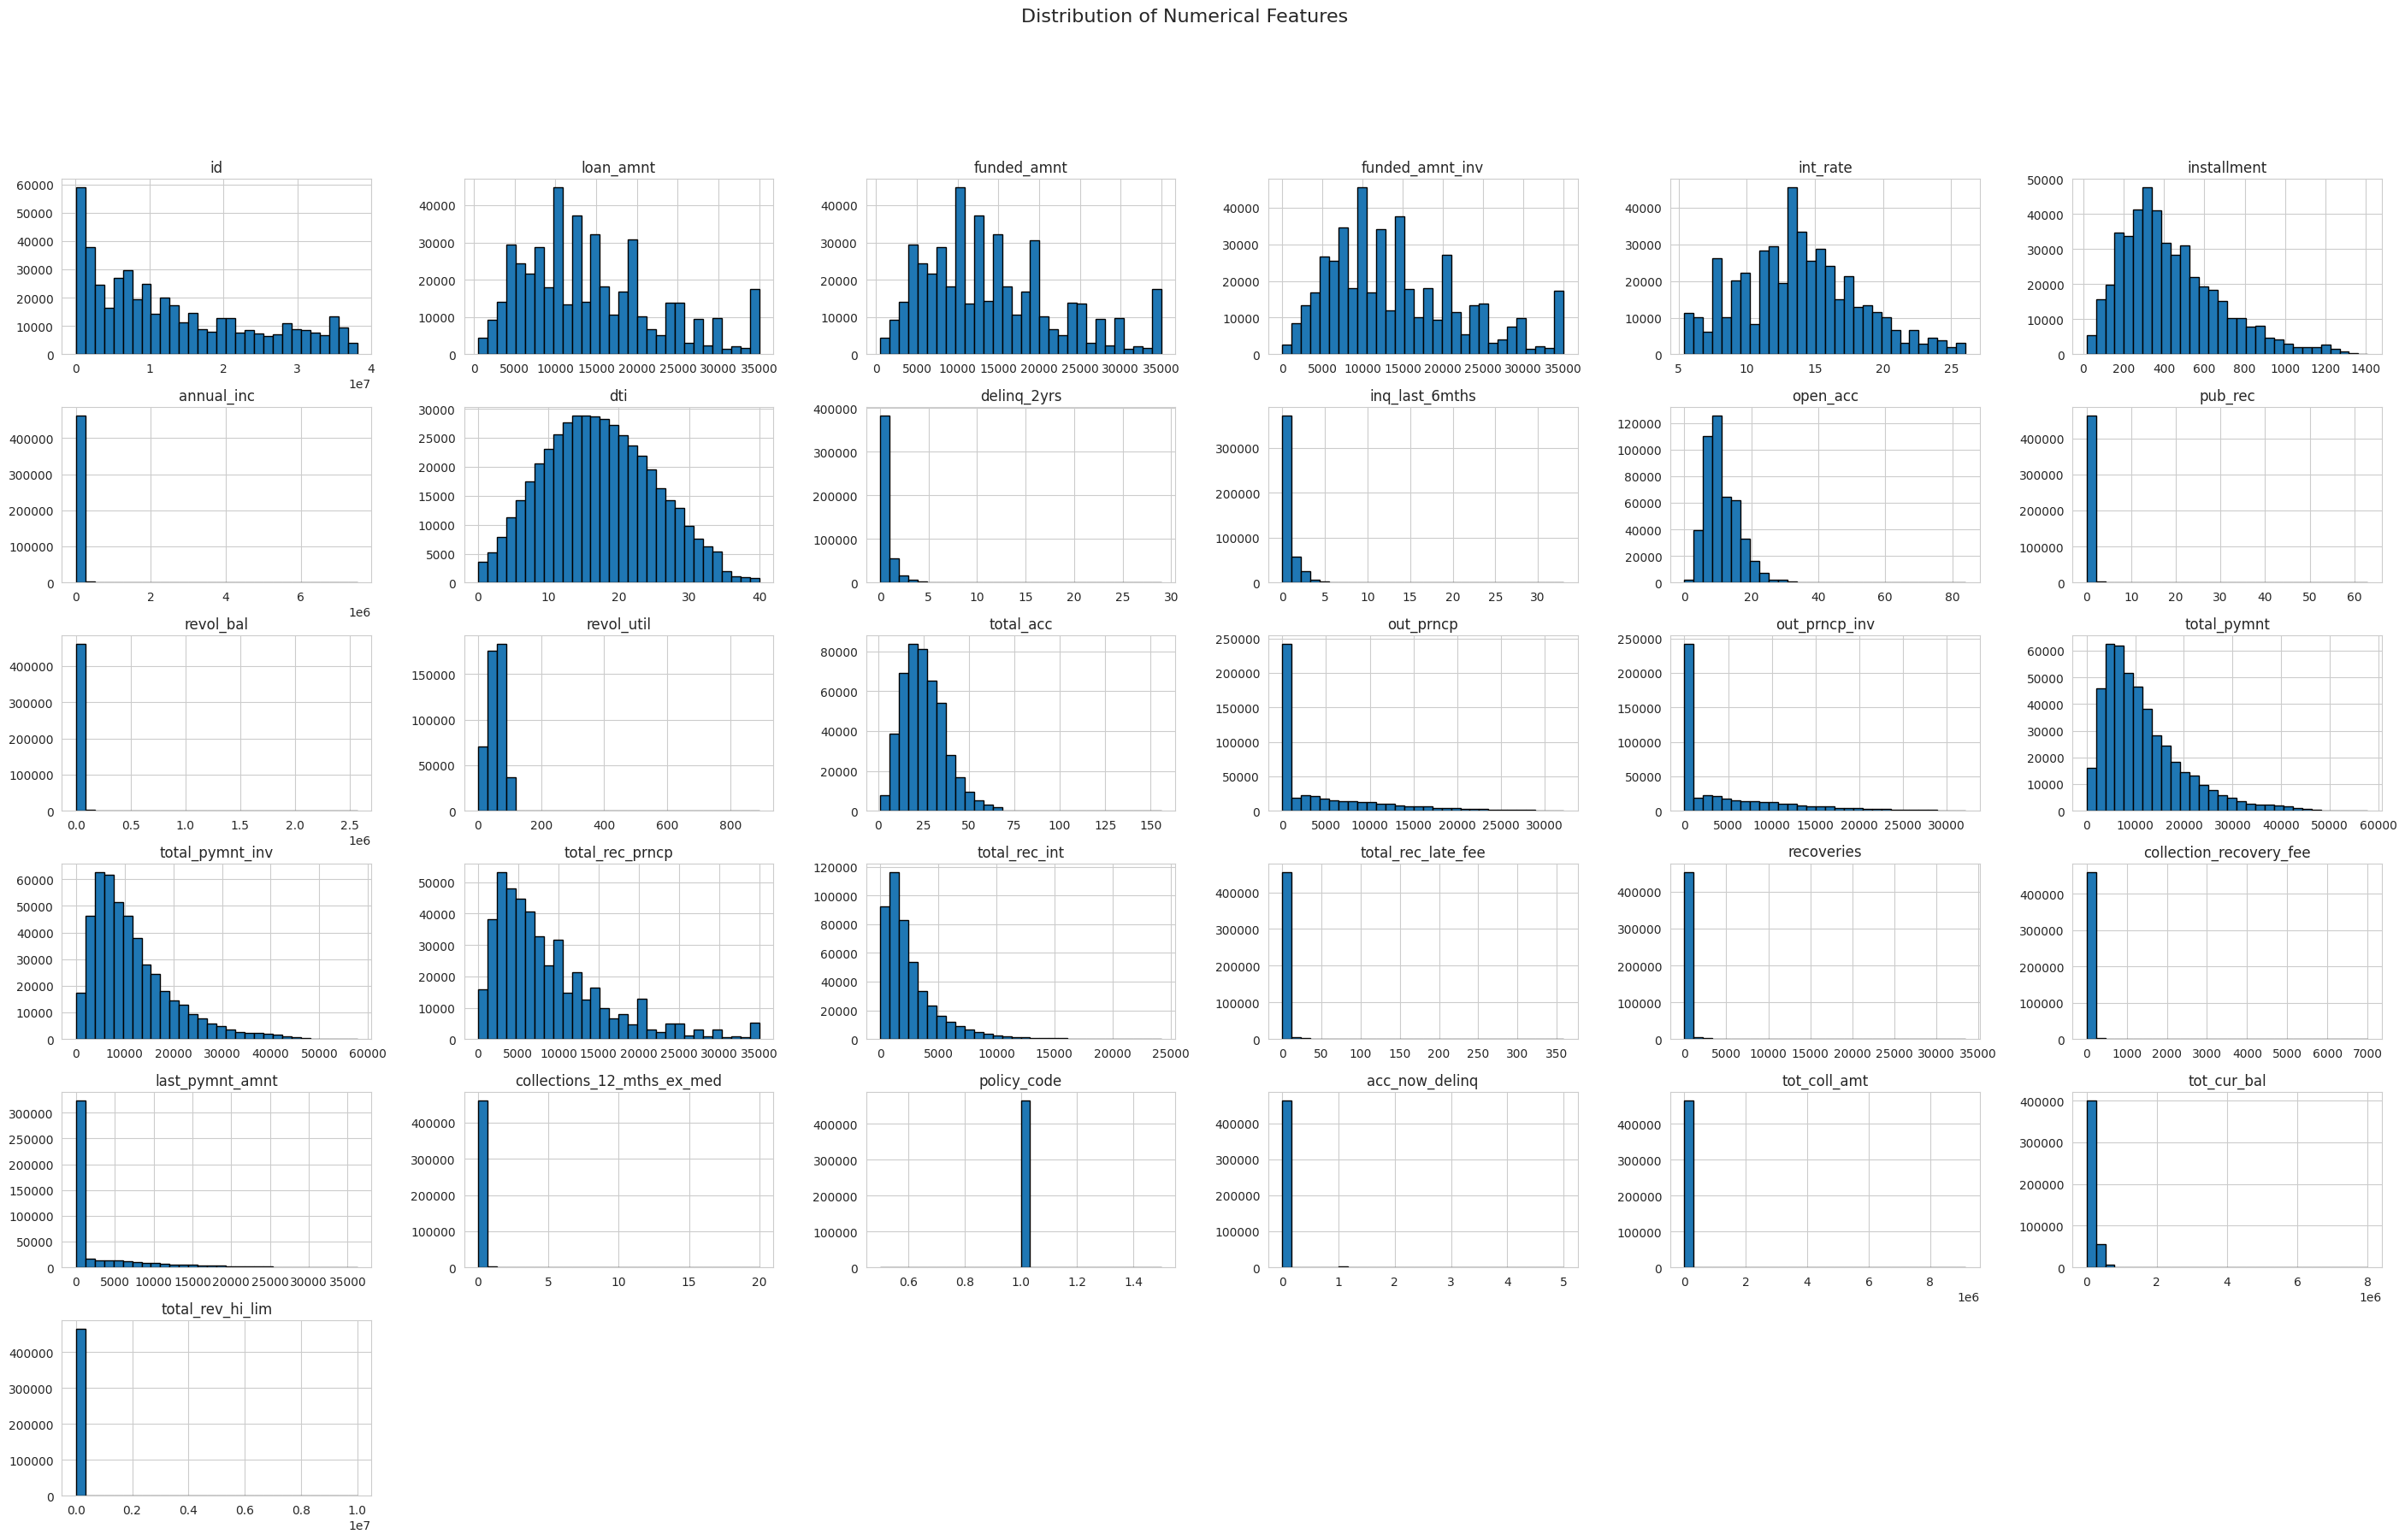

In [28]:
# distribution of numerical variables
numerical_col = df_loans.select_dtypes(exclude= "object").columns.tolist()
df_loans[numerical_col].hist(figsize=(35,20), bins=30, edgecolor= 'black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


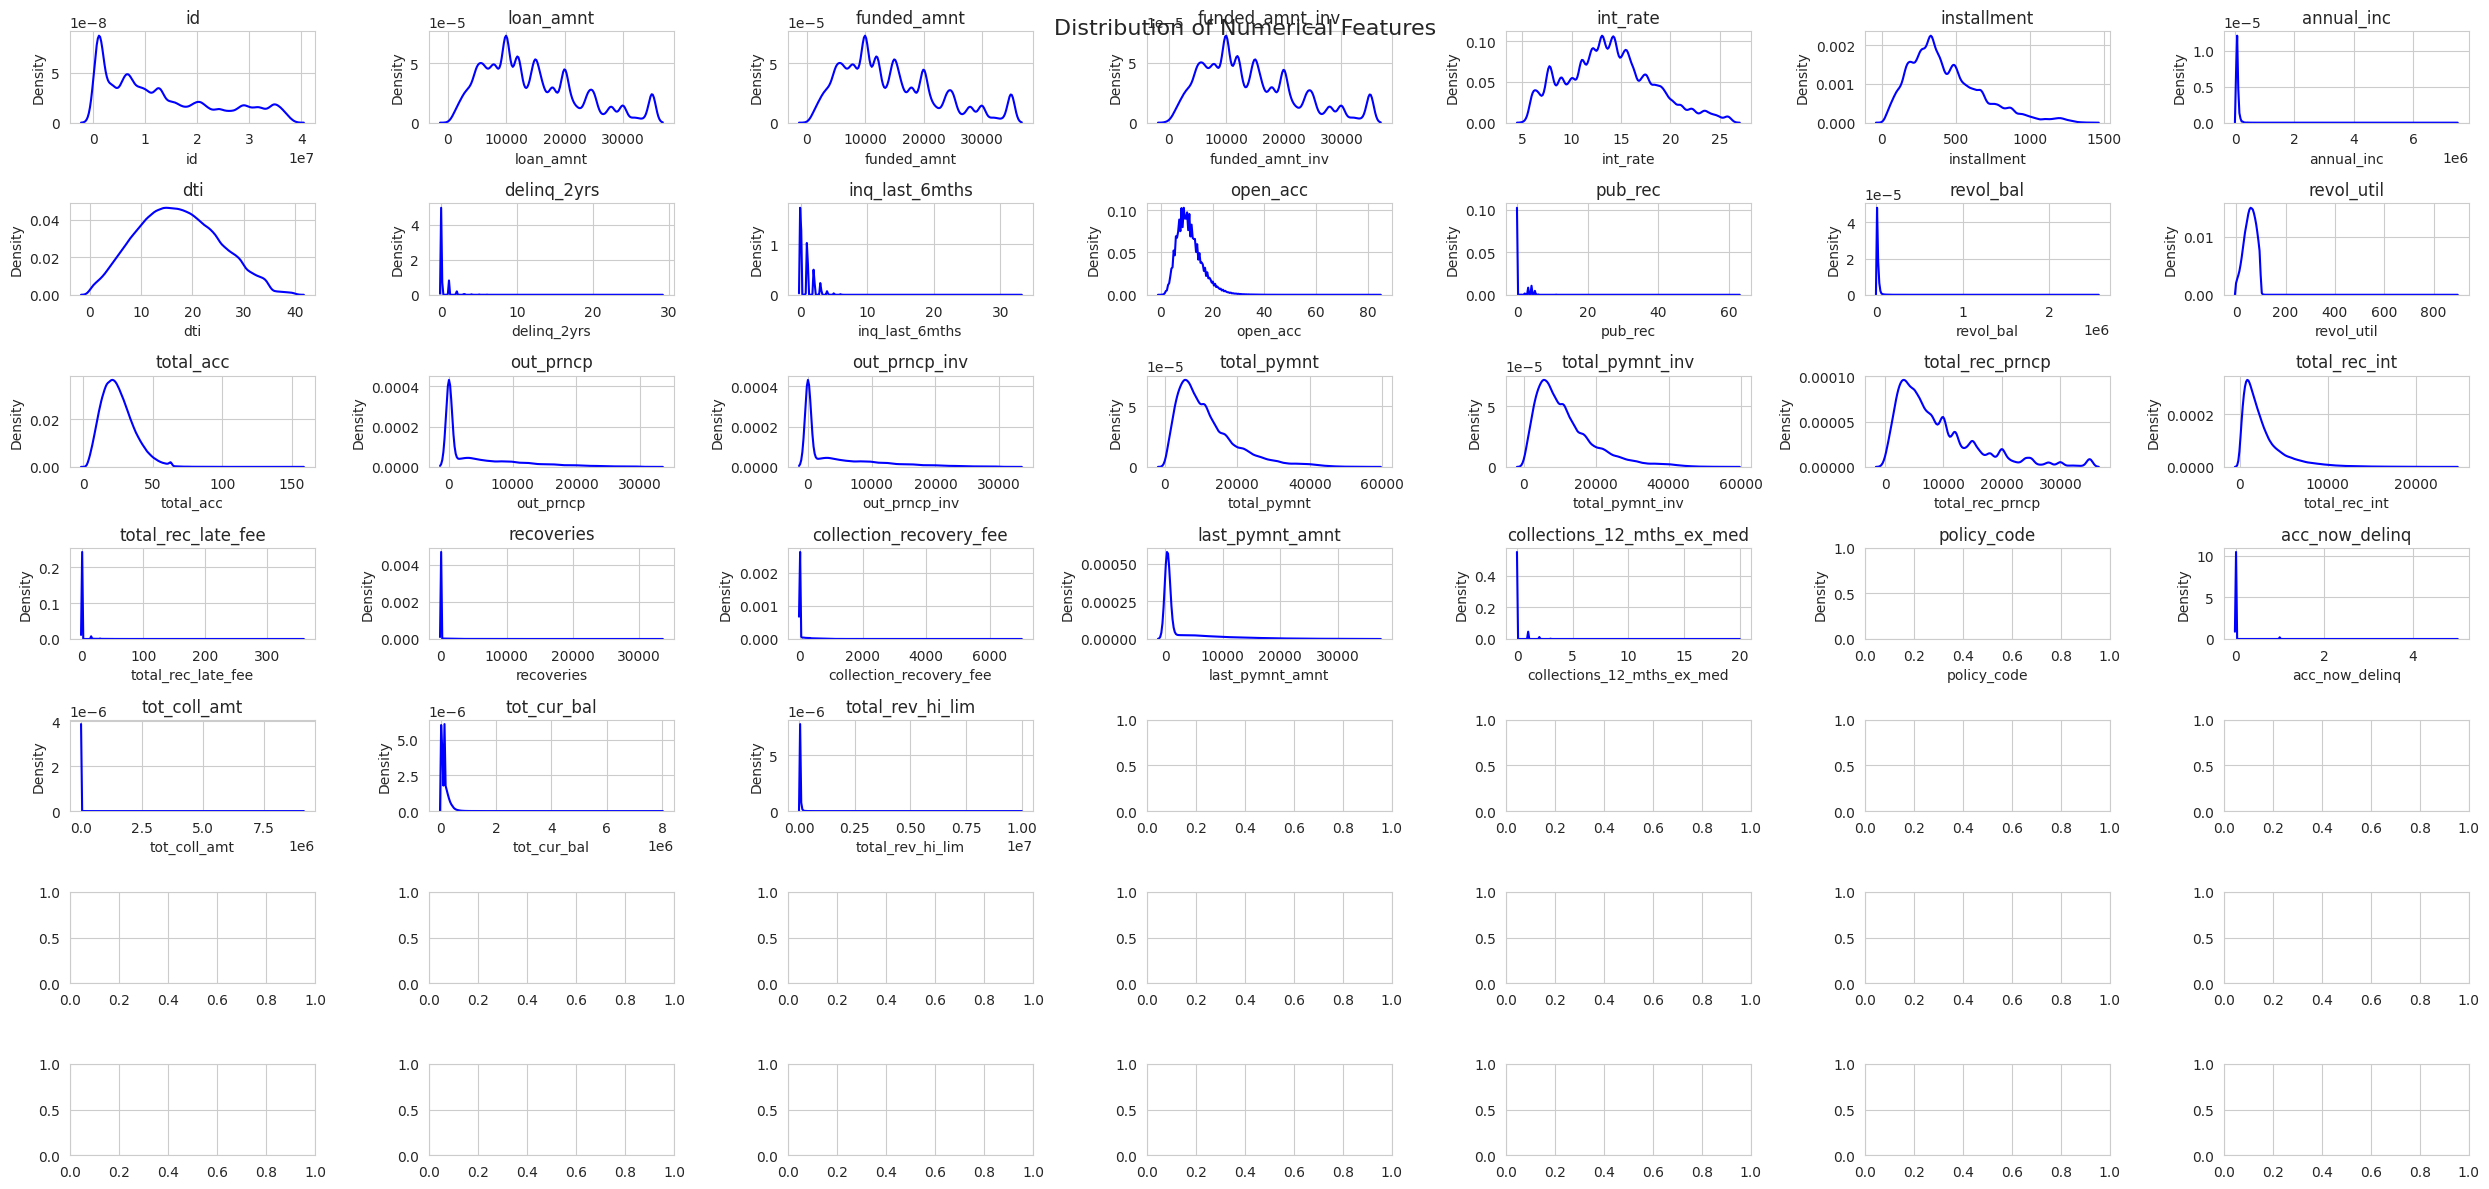

In [29]:
fig, axs = plt.subplots(7, 7, figsize=(25, 12))  # Adjust rows/columns based on your data
axs = axs.flatten()  # Flatten the array for easy iteration

# Loop through each numerical column and plot its KDE
for i in range(len(numerical_col)):
    sns.kdeplot(df_loans[numerical_col[i]], color='blue', ax=axs[i])
    axs[i].set_title(numerical_col[i])  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.suptitle("Distribution of Numerical Features", fontsize=16)  # Overall title
plt.show()  # Display the plots

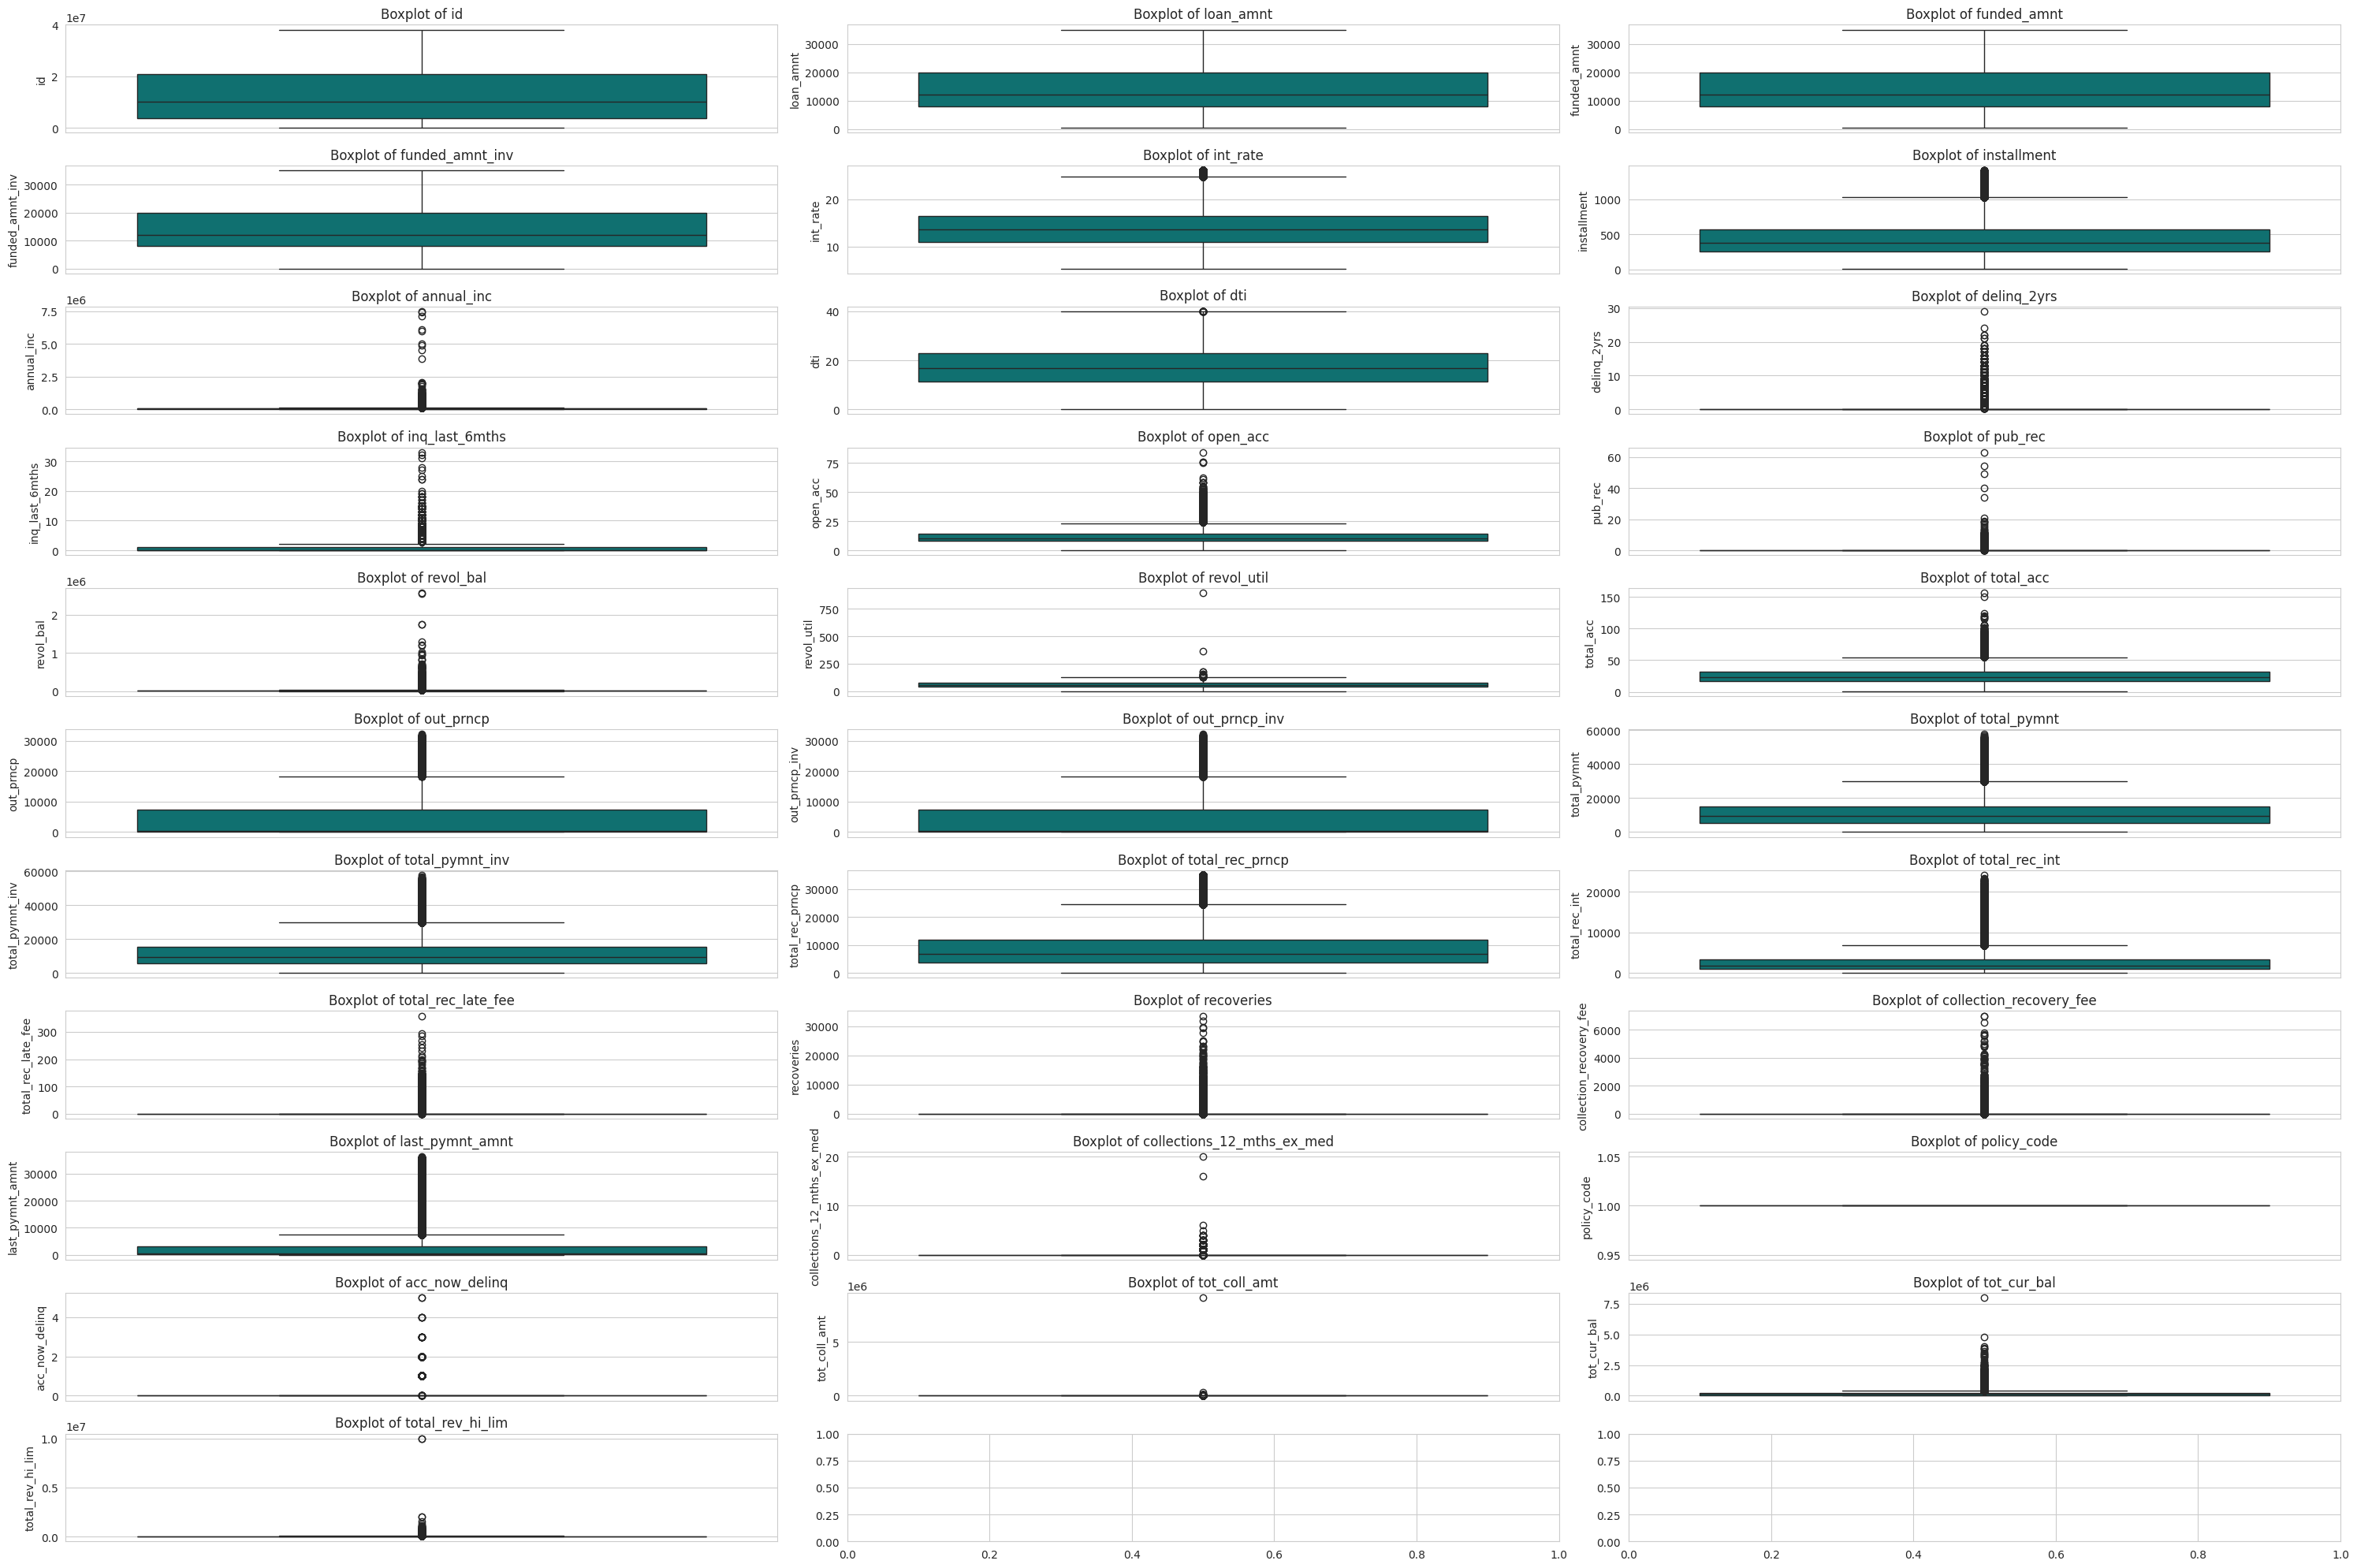

In [30]:
#  Boxplots to detect outliers
fig, axes = plt.subplots(len(numerical_col)//3 + 1, 3, figsize=(30, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_col):
    sns.boxplot(y=df_loans[col], ax=axes[i], color='teal')
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

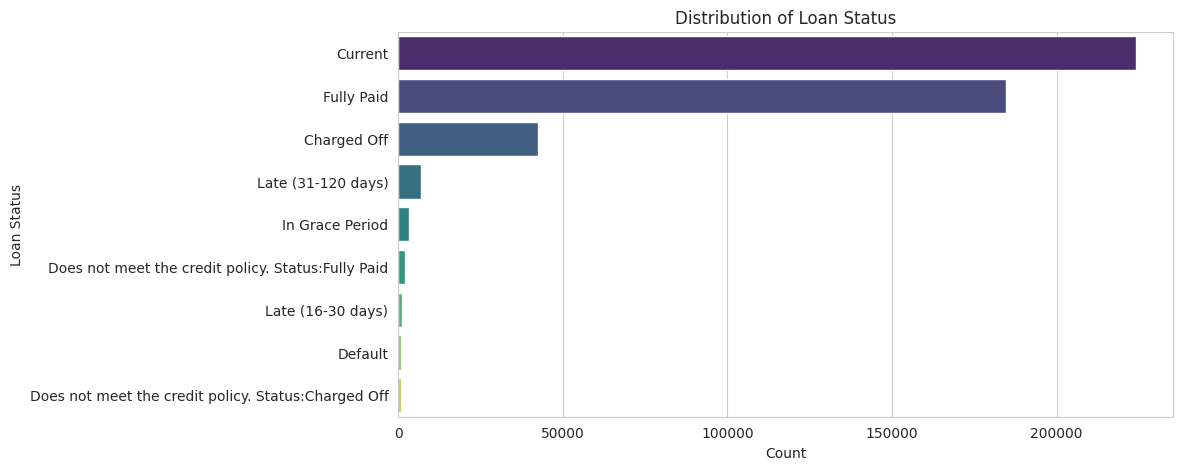

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [31]:
# Categorical variable distribution (Loan Status)
plt.figure(figsize=(10, 5))
sns.countplot(y=df_loans['loan_status'], order=df_loans['loan_status'].value_counts().index, palette='viridis')
plt.title("Distribution of Loan Status")
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.show()

df_loans['loan_status'].value_counts()

In [32]:
df_loansNew = df_loans
df_loansNew['Target'] = df_loansNew['loan_status'].apply(lambda x: 'Good Loans' if x in ['Current', 'Fully Paid', 'In Grace Period'] else 'Bad Loans')

In [33]:
# Count occurrences of each category in the 'Target' column
df_target_grp = df_loansNew['Target'].value_counts().reset_index()

# Rename columns for clarity
df_target_grp.columns = ['Target', 'Client_cnt']

# Calculate the percentage
df_target_grp['Percentage'] = round(df_target_grp['Client_cnt'] / df_target_grp['Client_cnt'].sum() * 100, 2)

# Display the result
df_target_grp


,Target,Client_cnt,Percentage
0,Good Loans,412111,88.38
1,Bad Loans,54174,11.62


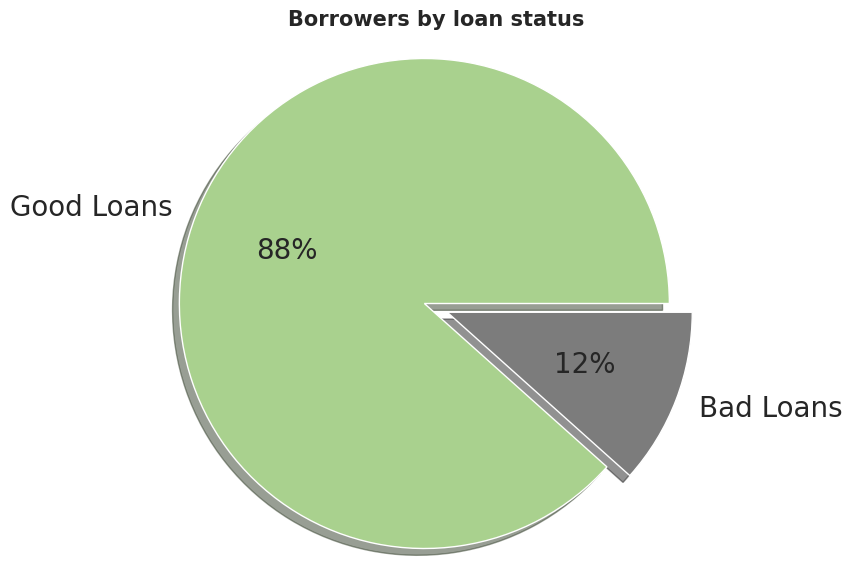

In [34]:
# Prepare data for pie chart
labels = df_target_grp['Target']
sizes = df_target_grp['Client_cnt']
explode = (0.1, 0)  # "explode" the first slice

# explode = [0.1] + [0] * (len(sizes) - 1)  # Dynamically adjust explode length


# Define custom colors for each wedge
colors = ['#A9D18E', '#7C7C7C']  # Custom colors for Good Loans and Bad Loans

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%', shadow=True, colors=colors, textprops={'fontsize': 20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Borrowers by loan status", fontsize=15, fontweight='bold')

# Show the plot
plt.show()

# Insights
- 88.38% of client didn't experience difficulty on paying, meaning that the company as a lender has good loan product performance, also has good risk management and assessment
- 11.62% of clients have difficuly paying, meaning that the company need to learn more about client characteristics so that the company can identify early warning signs and implement mitigation of failed payment

In [35]:
# visualizer
temp_pallete= {
    'Good Loans': '#A9D18E',
    'Bad Loans': '#7C7C7C'
}

def loan_trend_group(col):
    df_col_grp = df_loansNew.groupby(['Target', col]).size().reset_index(name="Client_cnt").sort_values("Client_cnt", ascending= False)
    df_col_grp["Percentage"] = df_col_grp["Client_cnt"] / df_col_grp["Client_cnt"].sum() * 100

    # df_col_grp = df_col_grp.sort_values(by= "percentage", ascending= False)
    return df_col_grp

def visualize_trend(object_col, chart_orientation, palette):
    fig, ax = plt.subplots(figsize=(20,12))
    ax.set_facecolor('white')

    col_grp = loan_trend_group(object_col)

    if chart_orientation == 'horizontal':
        ax_hbartype = sns.barplot(y=object_col, x='Percentage', hue='Target', data=col_grp, palette=palette)

        # Add text labels manually
        for p in ax_hbartype.patches:
            ax.text(p.get_x() + p.get_width() + 0.5,  # Adjust X position
                    p.get_y() + p.get_height() / 2,  # Adjust Y position
                    f"{p.get_width():.1f}%",       # Display percentage
                    ha='left', va='center', fontsize=6)

        plt.legend(loc='lower right')

    elif chart_orientation == 'vertical':
        ax_hbartype_vert = sns.barplot(y='Percentage', x=object_col, hue='Target', data=col_grp, palette=palette)

        # Add text labels manually
        for p in ax_hbartype_vert.patches:
            ax.text(p.get_x() + p.get_width() / 2,  # Adjust X position
                    p.get_y() + p.get_height() + 0.5,  # Adjust Y position
                    f"{p.get_height():.1f}%",       # Display percentage
                    ha='center', va='bottom', fontsize=8)

    plt.title(f"Client's loan status by {object_col}", fontsize= 12)
    plt.xlabel('Loan Status')
    plt.ylabel('Percentage by Total Clients')
    plt.xticks(rotation=45 if chart_orientation == 'vertical' else 0)

    plt.show()


def merged_grp(col):
    merged_df = df_loansNew.groupby(col)["Target"].value_counts().unstack(fill_value=0).reset_index()
    merged_df.rename(columns={"Good Loans": "good_cnt", "Bad Loans": "bad_cnt"}, inplace=True)

    merged_df['percentage_good'] = round(merged_df['good_cnt'] / (merged_df['good_cnt'] + merged_df['bad_cnt']) * 100, 2)
    merged_df['percentage_bad'] = round(merged_df['bad_cnt'] / (merged_df['good_cnt'] + merged_df['bad_cnt']) * 100, 2)

    # merged_df = merged_df.sort_values(by= "percentage_good", ascending= False)
    return merged_df


def loans_dist_categories(object_col, avg_line=False, rotate_xticks=False, no_text=False, label_size_x=13):
    fig, ax = plt.subplots(figsize=(20,12))
    ax.set_facecolor('white')

    dist_df = merged_grp(object_col).sort_values('percentage_good', ascending=False)

    ax_dist_good = ax.bar(dist_df[object_col], dist_df['percentage_good'], color='#A9D18E')
    ax_dist_bad = ax.bar(dist_df[object_col], dist_df['percentage_bad'], bottom=dist_df['percentage_good'], color='grey')

    if not no_text:
        for bar in ax.patches:
            height = bar.get_height()
            y_position = bar.get_y()
            if y_position == 0:
              color = 'black'
            else:
              color = 'white'

            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, f'{round(height,2)}%', ha='center', va='center', fontsize=12, color=color)

    max_value = dist_df['percentage_good'].max()
    avg_value = dist_df['percentage_good'].mean()

    ax.axhline(max_value, color='white', linestyle='--', linewidth=2, label=f'Max Value: {round(max_value, 2)}%')

    if avg_line:
        ax.axhline(avg_value, color='#F7CA77', linestyle='--', linewidth=2, label=f'Avg Value: {round(avg_value, 2)}%')

    plt.title(f"Client's Loan Status by {object_col}")
    plt.xlabel(f'{object_col}', fontsize=12)
    ax.tick_params(axis='x', labelsize=label_size_x)

    if rotate_xticks == True:
      plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate for better spacing
      plt.subplots_adjust(bottom=0.3)  # Increase bottom margin

    # if rotate_xticks:
    #     plt.xticks(rotation=45)

    plt.show()




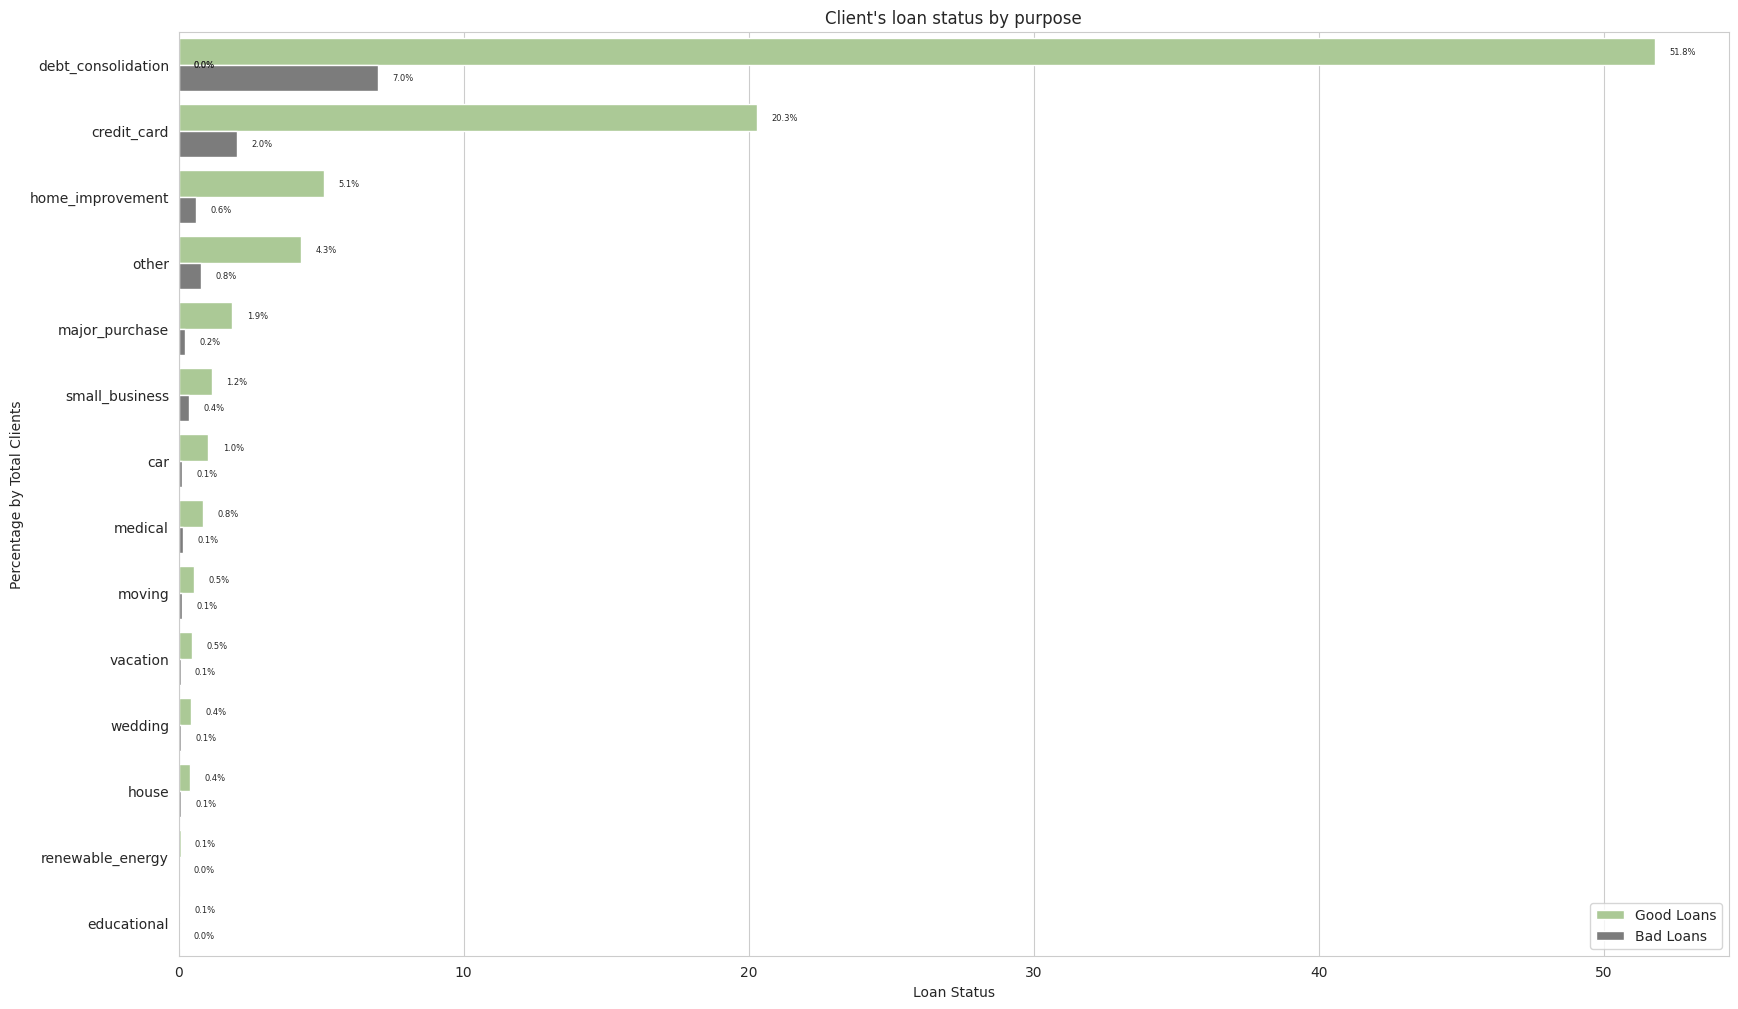

In [36]:
visualize_trend('purpose', 'horizontal', temp_pallete)

# Insights
A significant portion of borrowers, specifically 51.80%, utilize loans for debt consolidation, while 21.17% opt for credit card loans. This trend indicates a preference for debt consolidation loans, likely due to their typically longer repayment terms compared to other loan types. As noted by Forbes.com, although borrowers may incur interest over an extended period, this approach can substantially lower their monthly payments.

The prevalence of credit card loans can be attributed to their faster application processes and quicker approvals, making them attractive for those facing immediate financial needs or unexpected expenses.

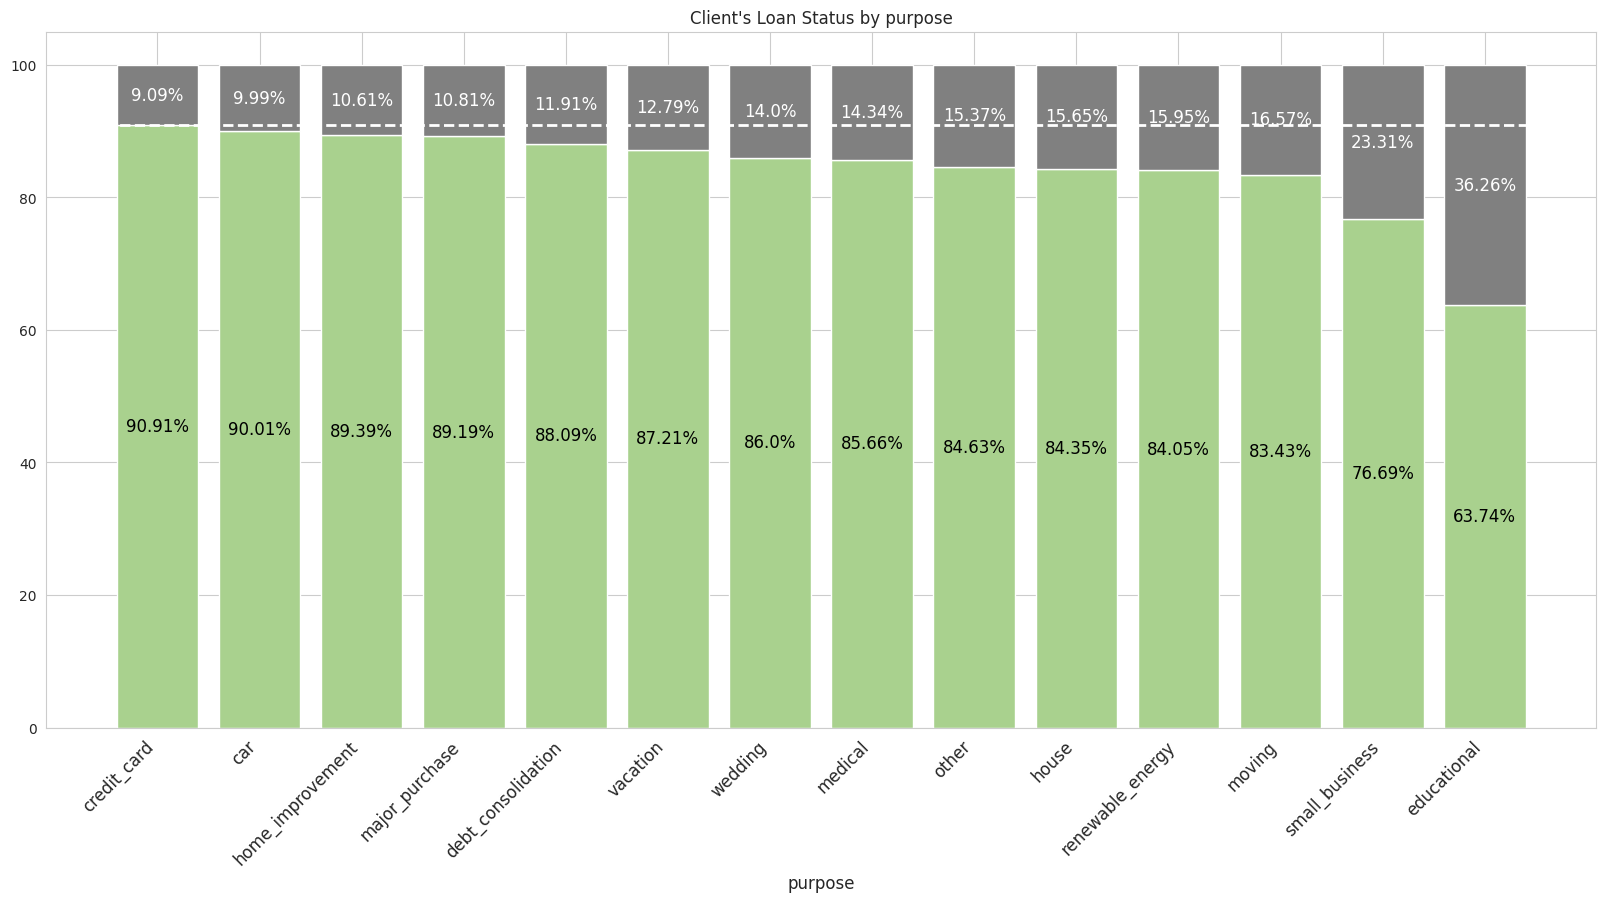

In [37]:
loans_dist_categories('purpose', False, True, False, 15)

# Insights
Most loan purposes achieve a good loan rate of 80% or higher, with only two categories falling below this level, indicating the effectiveness of the current risk assessment model in evaluating borrowers capabill.

Among these, borrowers seeking credit card loans have the highest good loan rate, exceeding 90%, despite representing just over 22% of the total borrower base. This suggests that nearly one-fifth of these borrowers are likely to repay their loans successfully.

Borrowers with car payment loans also show a strong good loan rate of 90%, although they make up only about 1% of all borrowers. Similarly, those seeking loans for home improvement and major purchases have high good loan rates, differing by only 0.5% to 1%, despite comprising a maximum of 5% of the total.
Debt consolidation borrowers exhibit an 88% good loan rate and account for over 57% of the total borrower base, indicating that more than half are less likely to struggle with repayments. This group may benefit from tailored financial products.

Conversely, borrowers focused on small business and education loans show the lowest good loan rates, ranging from 63% to 76%, and have the highest incidence of payment difficulties, marking them as higher-risk categories despite their smaller share of the overall borrower base.

In [38]:
df_loansNew= df_loansNew[df_loansNew['home_ownership']!='ANY']

In [39]:
print(df_loansNew['home_ownership'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


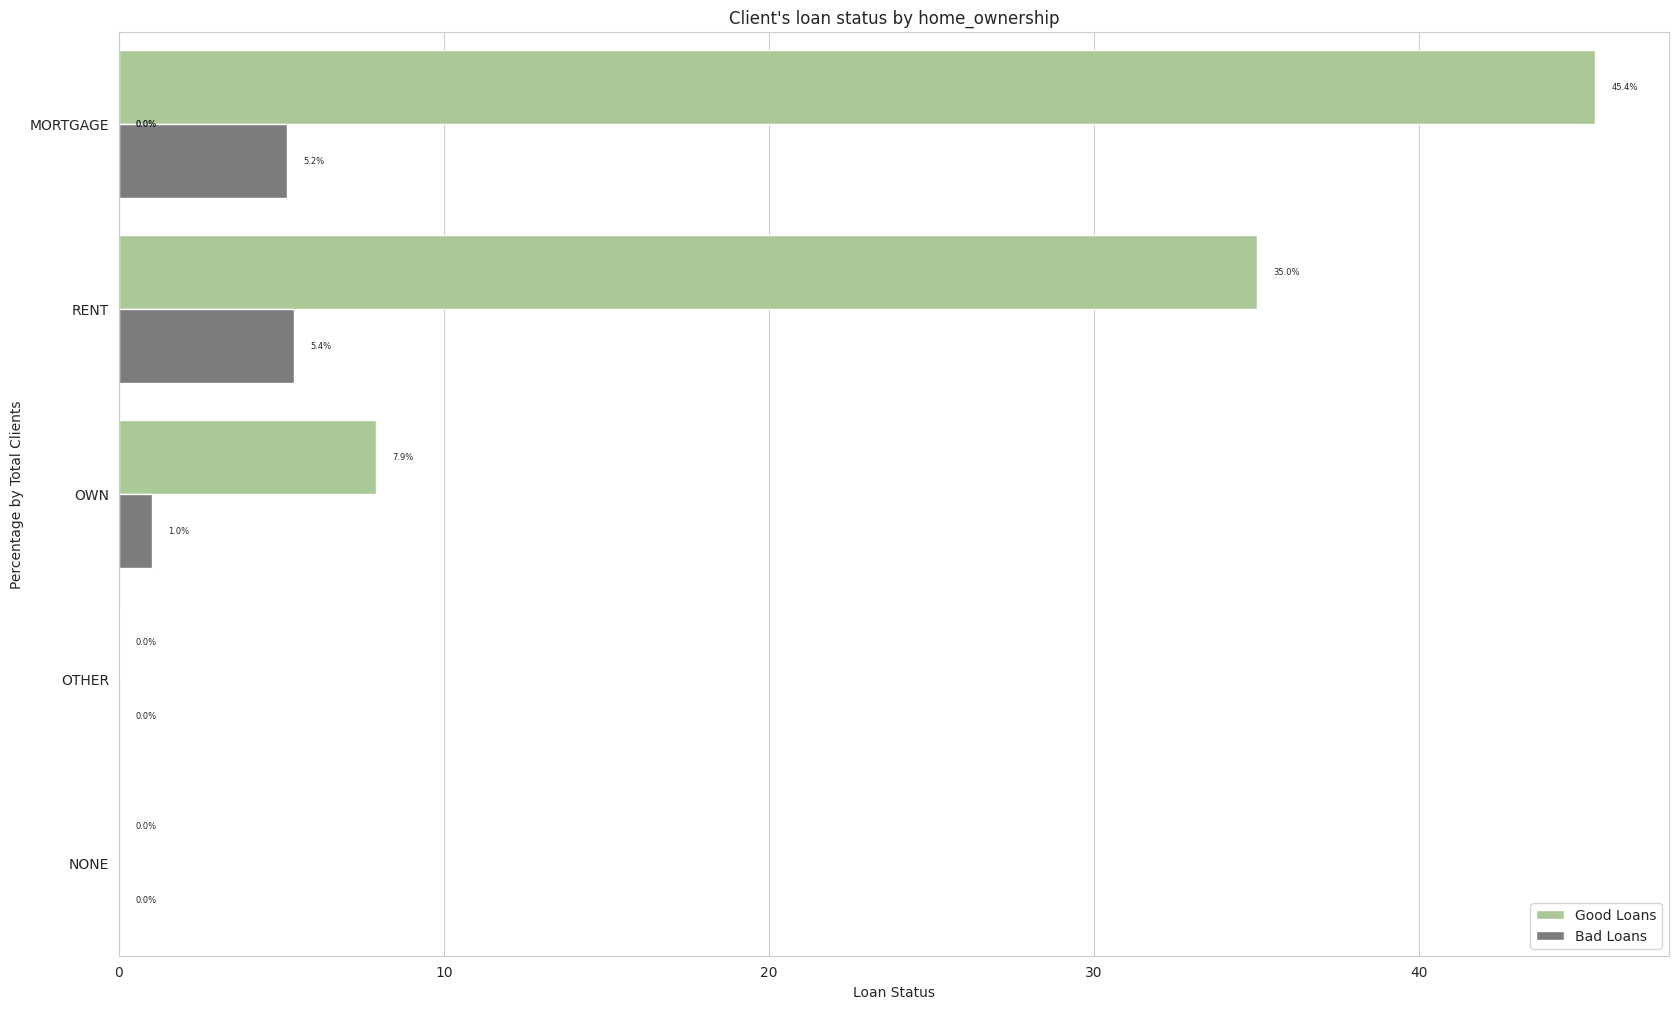

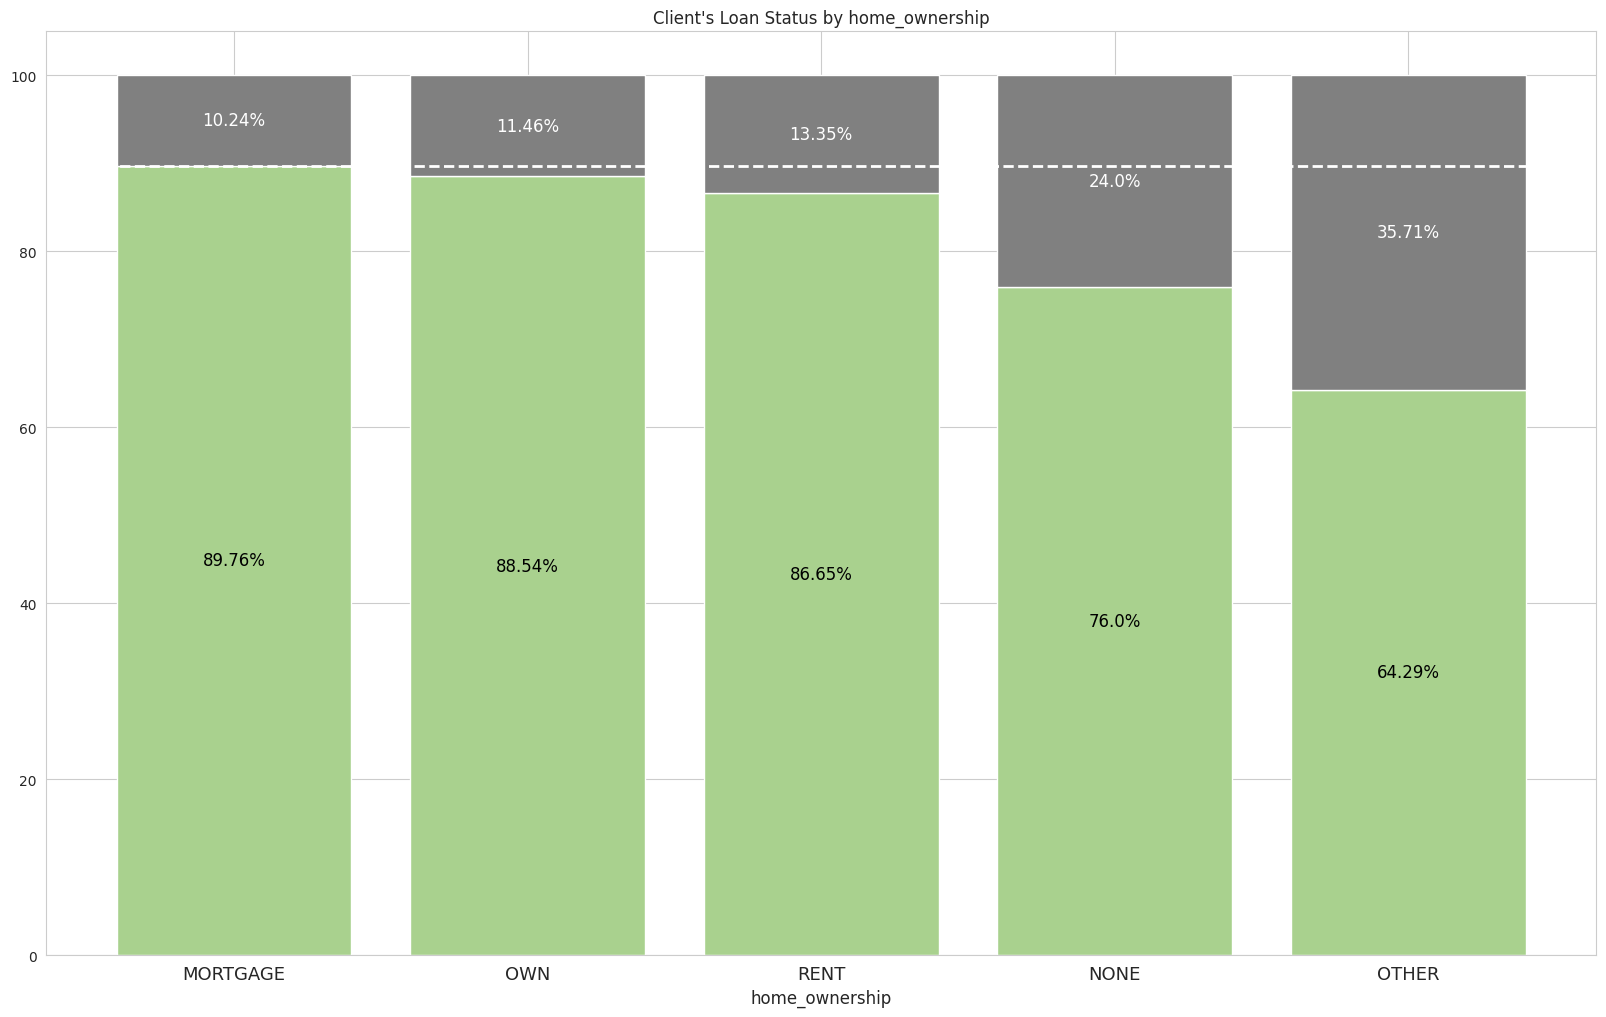

In [40]:
visualize_trend('home_ownership', 'horizontal', temp_pallete)
loans_dist_categories('home_ownership')

# Insights
Borrowers with mortgages have the highest rate of good loans, exceeding 89%, and make up over 50% of the total borrower base. This suggests that mortgage borrowers are generally more capable of repaying their loans.

Homeowners, who have a slightly higher percentage of good loans than renters, fall into the second-highest category. Despite being fewer in number, homeowners are more likely to meet their loan obligations, indicating greater financial stability.

In contrast, borrowers who do not own a home or do not specify their ownership status exhibit the lowest good loan rates, ranging from 64% to 76%. These groups represent a small portion of the borrower base (about 0.02%) and may be less suitable for targeting, as they are more likely to struggle with loan repayments.

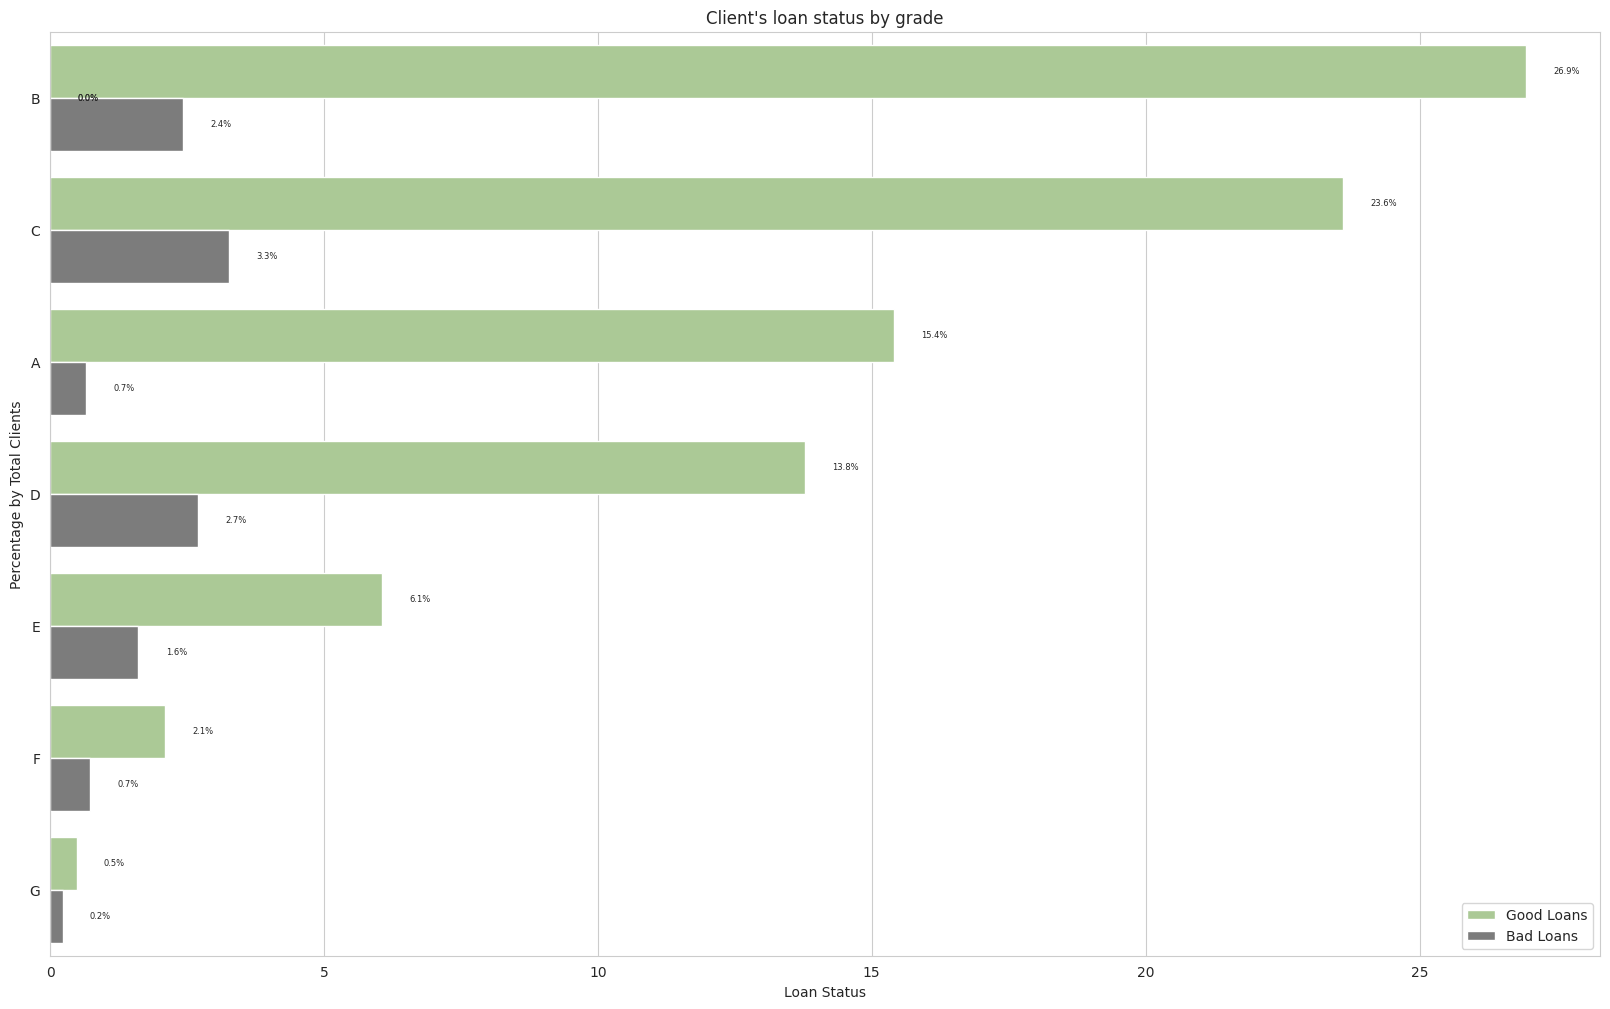

In [41]:
visualize_trend('grade', 'horizontal', temp_pallete)

# Insights
Grade B clients, at 26.9%, represent the highest percentage of borrowers with good loans, followed closely by Grade C, which has a margin of about 3%. This indicates a significant number of low-risk borrowers alongside a considerable group of moderate-risk borrowers.

Grade A, with 15.40% of clients having good loans, reflects a strong low-risk category with solid profiles and excellent credit histories. In contrast, Grade D, at 13.78%, includes many borrowers with good loans but poses higher risks for the company. According to consumerfinance.gov, higher interest rates may be warranted due to the perceived risk associated with lending to these borrowers.

Grades E, F, and G have the lowest percentages and represent the highest risk levels. Borrowers in these categories are more likely to default, necessitating stricter lending criteria for their loan applications.

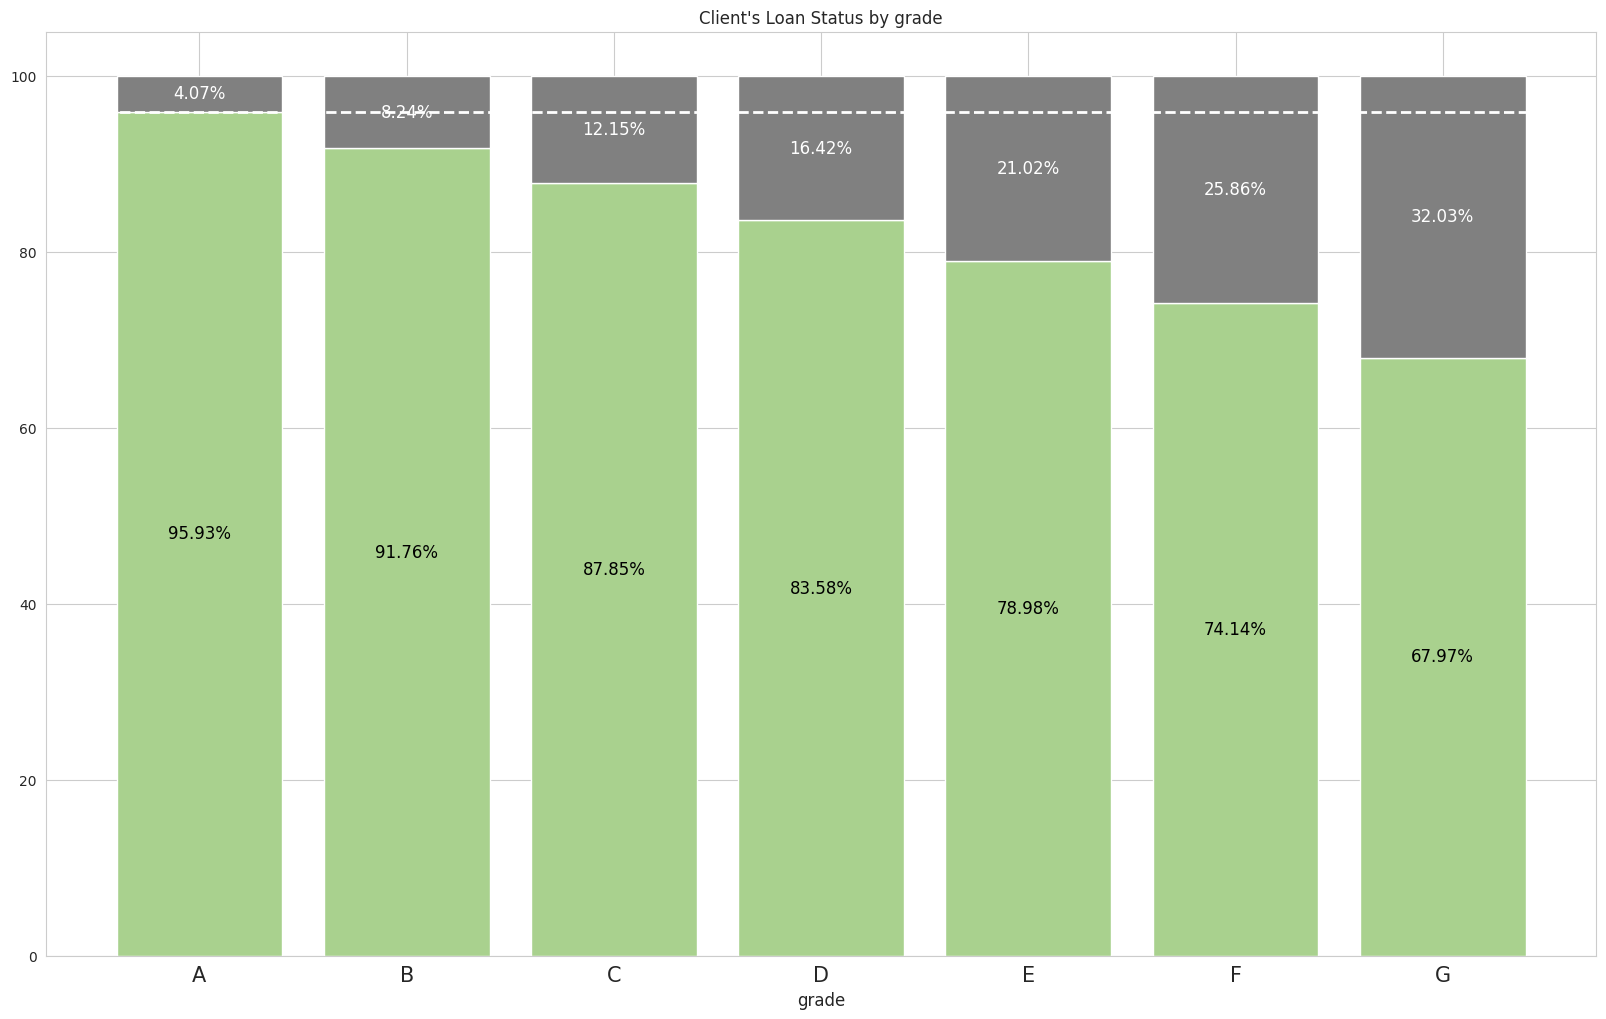

In [42]:
loans_dist_categories('grade', False, False, False, 15)

# Insights
Although Grade A does not have the highest number of clients, it boasts the highest percentage of good loans at approximately 96%. This suggests that clients in this grade are less likely to face repayment difficulties, indicating they represent the lowest risk.

There is a clear upward trend in risk, with bad loan percentages increasing from 4% and doubling as grades decrease from A to G. It is expected that around 83% of clients within each loan grade will have good loans, indicating that most clients are likely to repay their loans. However, the company should exercise caution with lower-grade loans, as these clients, while a minority of the total base, exhibit the highest percentage of bad loans compared to those in mid to higher grades.

In [43]:
print(df_loans['earliest_cr_line'].unique())

['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov-05' 'Nov-00' 'May-07' 'Jan-91' 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93'
 'Jun-06' 'Feb-04' 'Dec-90' 'Mar-00' 'Feb-95' 'Jul-

In [44]:
def convert_year_format(date_str):
    if pd.isnull(date_str):
        return date_str
    month_year = date_str.split('-')
    if len(month_year) == 2:
        month = month_year[0]
        year = month_year[1]
        # Convert two-digit year to four-digit year
        if len(year) == 2:
            year = '20' + year if int(year) <= 30 else '19' + year
        return f"{month}-{year}"
    return date_str

In [45]:
# scrape from earliest_cr_line
# format the datetime string to object and extract the year
earliest_cr_year = df_loansNew['earliest_cr_line'].mode()[0]
df_loansNew['earliest_cr_line'] = df_loansNew['earliest_cr_line'].fillna(earliest_cr_year)
# Apply the conversion function to standardize date format
df_loansNew['earliest_cr_line'] = df_loansNew['earliest_cr_line'].apply(convert_year_format)

df_loansNew['earliest_cr_year'] = pd.to_datetime(df_loansNew['earliest_cr_line'], format='%b-%Y').dt.year.clip(upper=2014)

for index, rows, in df_loansNew.iterrows():
  credit_history = 2014 - rows['earliest_cr_year']
  if credit_history <= 2:
    df_loansNew.at[index, 'credit_history'] = '0-2 years'
  elif credit_history <= 5:
    df_loansNew.at[index, 'credit_history'] = '2-5 years'
  else:
    df_loansNew.at[index, 'credit_history'] = '5+ years'

In [46]:
print (df_loansNew['earliest_cr_line'].unique())

['Jan-1985' 'Apr-1999' 'Nov-2001' 'Feb-1996' 'Jan-1996' 'Nov-2004'
 'Jul-2005' 'Jan-2007' 'Apr-2004' 'Sep-2004' 'Jan-1998' 'Oct-1989'
 'Jul-2003' 'May-1991' 'Sep-2007' 'Oct-1998' 'Aug-1993' 'Oct-2003'
 'Jan-2001' 'Nov-1997' 'Feb-1983' 'Jul-1985' 'Apr-2003' 'Jun-2001'
 'Feb-2002' 'Aug-1984' 'Nov-2006' 'Dec-1987' 'Nov-1981' 'Feb-1997'
 'Apr-2005' 'Oct-2007' 'Dec-2000' 'Apr-2007' 'Dec-2001' 'Jan-2003'
 'Mar-1994' 'Sep-1998' 'Jun-2004' 'Nov-1995' 'Jul-1999' 'Jun-1995'
 'Sep-1992' 'Jan-2002' 'Apr-1992' 'Oct-2006' 'May-2000' 'Dec-1998'
 'Dec-2004' 'Oct-2000' 'May-2002' 'May-2006' 'Jul-2002' 'Jul-2006'
 'May-1997' 'Oct-2005' 'Apr-1995' 'Oct-2002' 'Jan-2000' 'Apr-2000'
 'Dec-1994' 'Sep-2005' 'Dec-1984' 'Dec-1999' 'Nov-2003' 'Jun-1989'
 'Jun-2003' 'Oct-1996' 'May-2003' 'Jun-2002' 'Jun-2007' 'Dec-1996'
 'Feb-1984' 'Sep-2002' 'Jan-1986' 'May-1998' 'Jan-1997' 'Jun-2005'
 'Feb-1990' 'Mar-2004' 'Jul-1995' 'Aug-1994' 'Jun-1992' 'Mar-1997'
 'Apr-2006' 'Apr-1990' 'Aug-1999' 'Sep-2000' 'Feb-2001' 'Dec-1

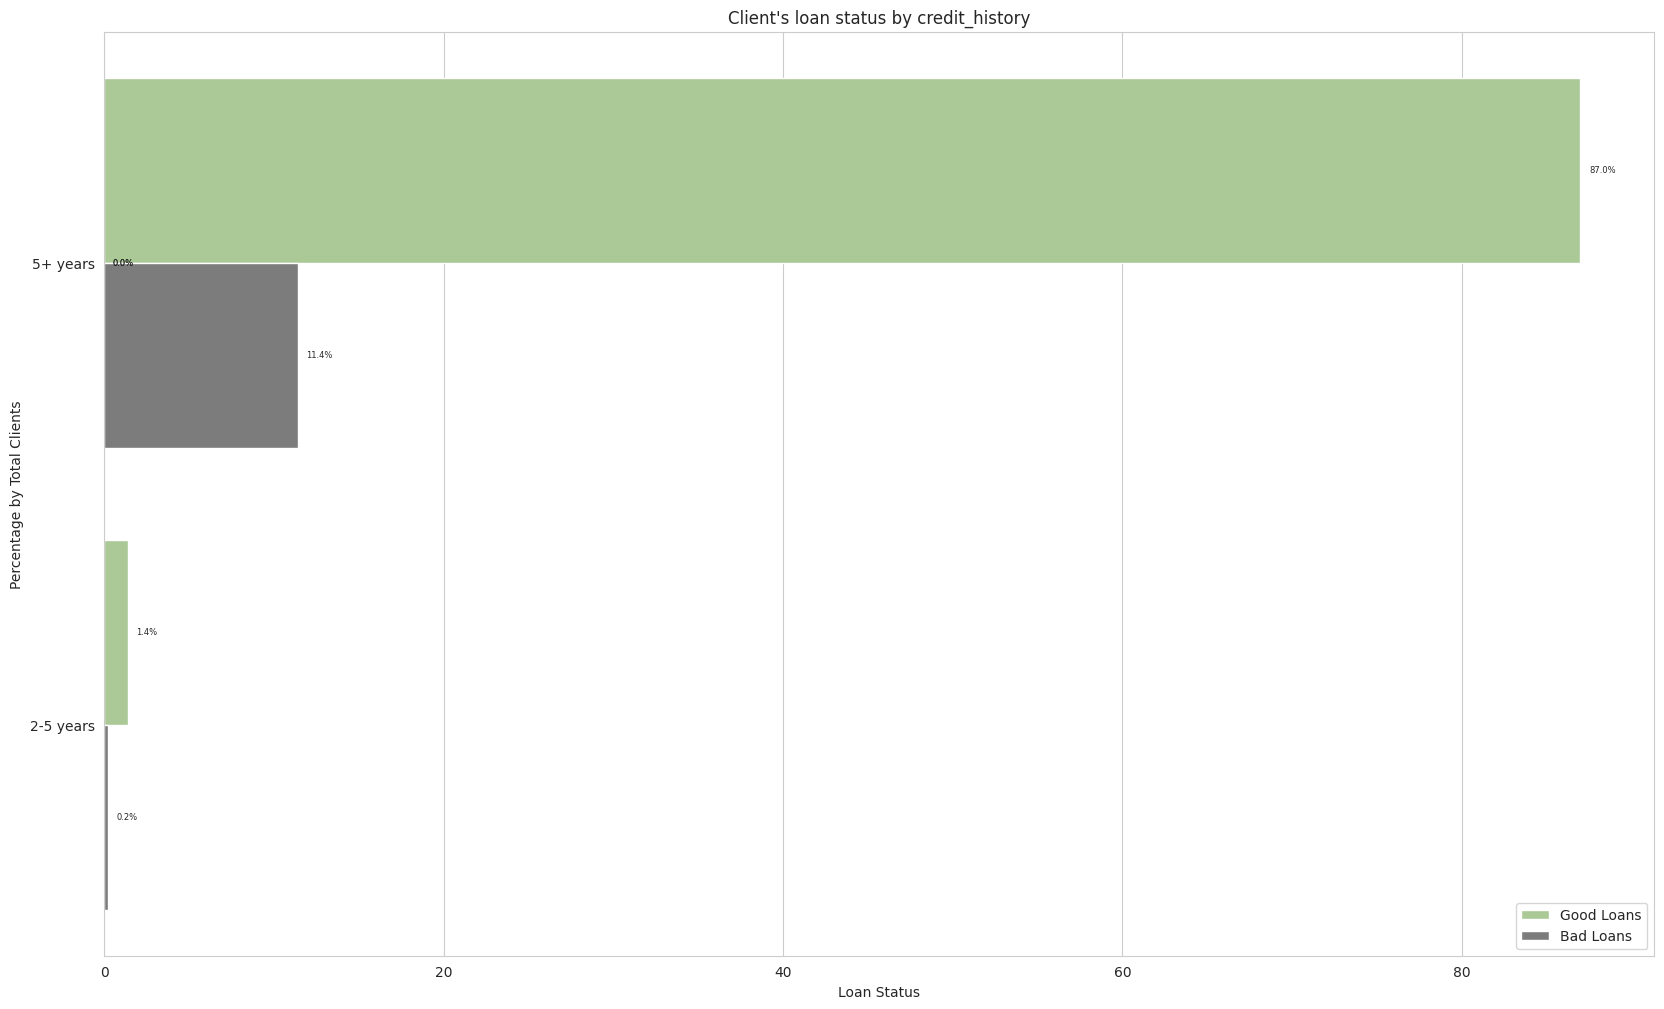

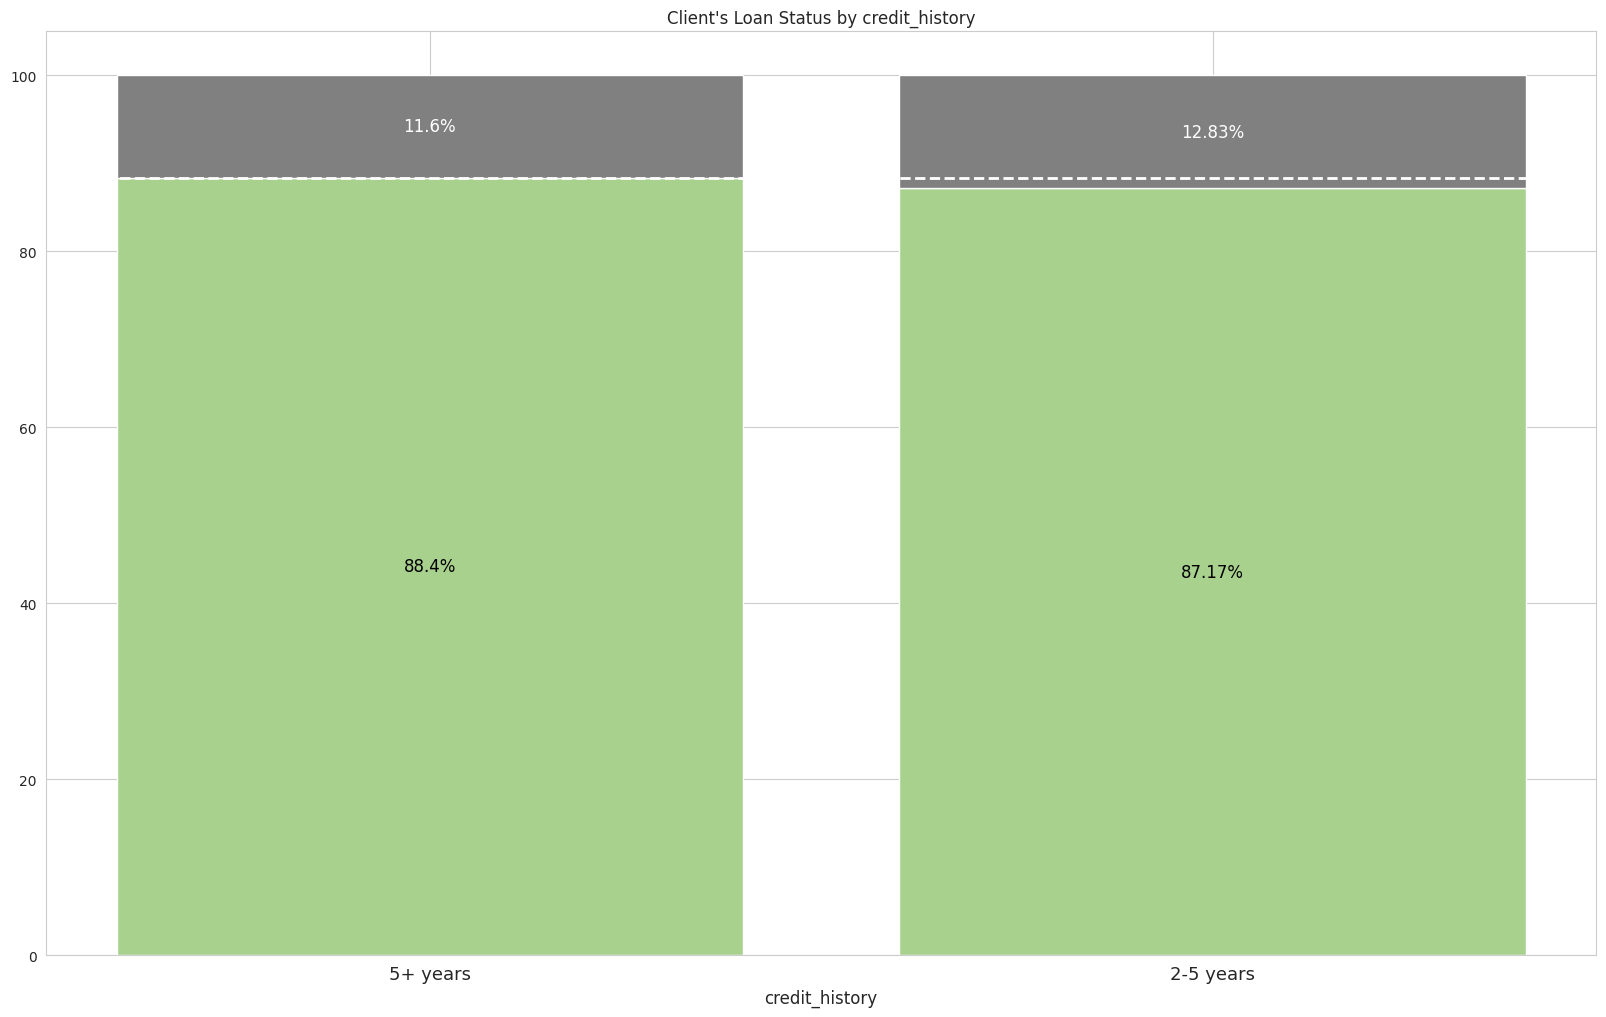

In [47]:
visualize_trend('credit_history', 'horizontal',temp_pallete)
loans_dist_categories('credit_history')

# Insights
A substantial portion of the company's borrower base consists of individuals with long credit histories (5+ years), representing 87% among borrowers. This groups also indicates highest rate of successful loans, exceeding 85%. This means the loan products may be tailored to meet needs that typically arise later in life, such as hight-limit personal loans for purposes like debt-consolidation, which aligns with the analysis results on borrowers loan purposes.

In contrast, borrowers with medium (2-5) credit histories encompass only a small fraction of the total borrower base, accounting for less than 2%, 1.40% to be precise. Despite the underrepresentation, medium group demonstrate a successful loans rate comparable to that of long-term borrowers, with only a 1-2% difference. This suggests that the length of a borrower's credit history may not be a decisive indicator of their ability to repay loans

In [48]:
def categorize_emp_length(emp_length):
    if pd.isnull(emp_length):
        return 'Unknown'

    if emp_length == '< 1 year':
        years = 0
    elif emp_length == '10+ years':
        years = 10
    else:
        years = int(emp_length.split()[0])  # Extract the number before "years"

    # categorize tenure based on years
    if years < 2:
        return 'Short'
    elif years <= 5:
        return 'Medium'
    elif years <= 9:
        return 'Long'
    else:
        return 'Very Long'

df_loansNew['emp_tenure'] = df_loansNew['emp_length'].apply(categorize_emp_length)

In [49]:
df_loansNew['emp_tenure'].unique()

array(['Very Long', 'Short', 'Medium', 'Long'], dtype=object)

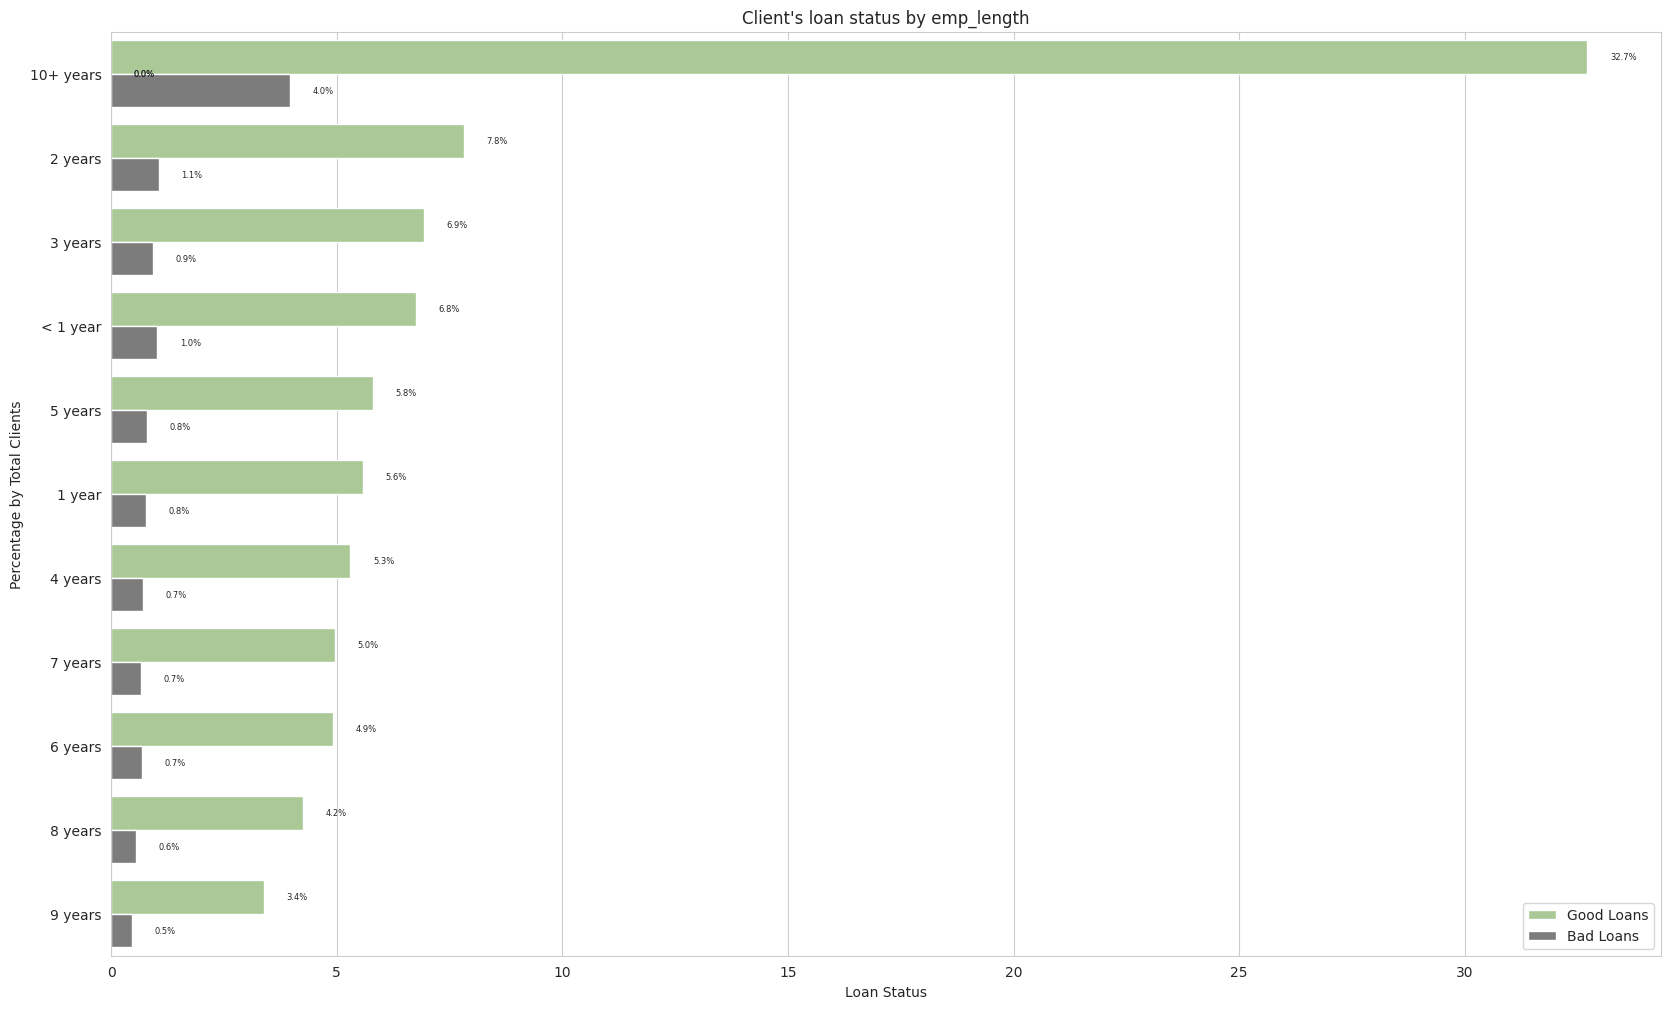

In [50]:
visualize_trend('emp_length', 'horizontal', temp_pallete)

# insights
32.7% of borrowers with over 10 years of employment exhibit the highest rate of good loans, a notable contrast compared to other employment tenure groups. This indicates that a significant proportion of these borrowers likely have a stable income source, reducing the likelihood of repayment difficulties. This observation aligns with Borsi (2018), which highlights that borrowers with longer employment histories tend to face lower risks of repayment challenges. This trend may be attributed to the increased financial stability that typically accompanies longer employment tenure.

Additionally, borrowers with 2 years of employment rank second, with 7.8% experiencing no repayment difficulties. This suggests that a considerable number of borrowers in the early stages of their careers are still financially stable enough to meet their loan obligations.

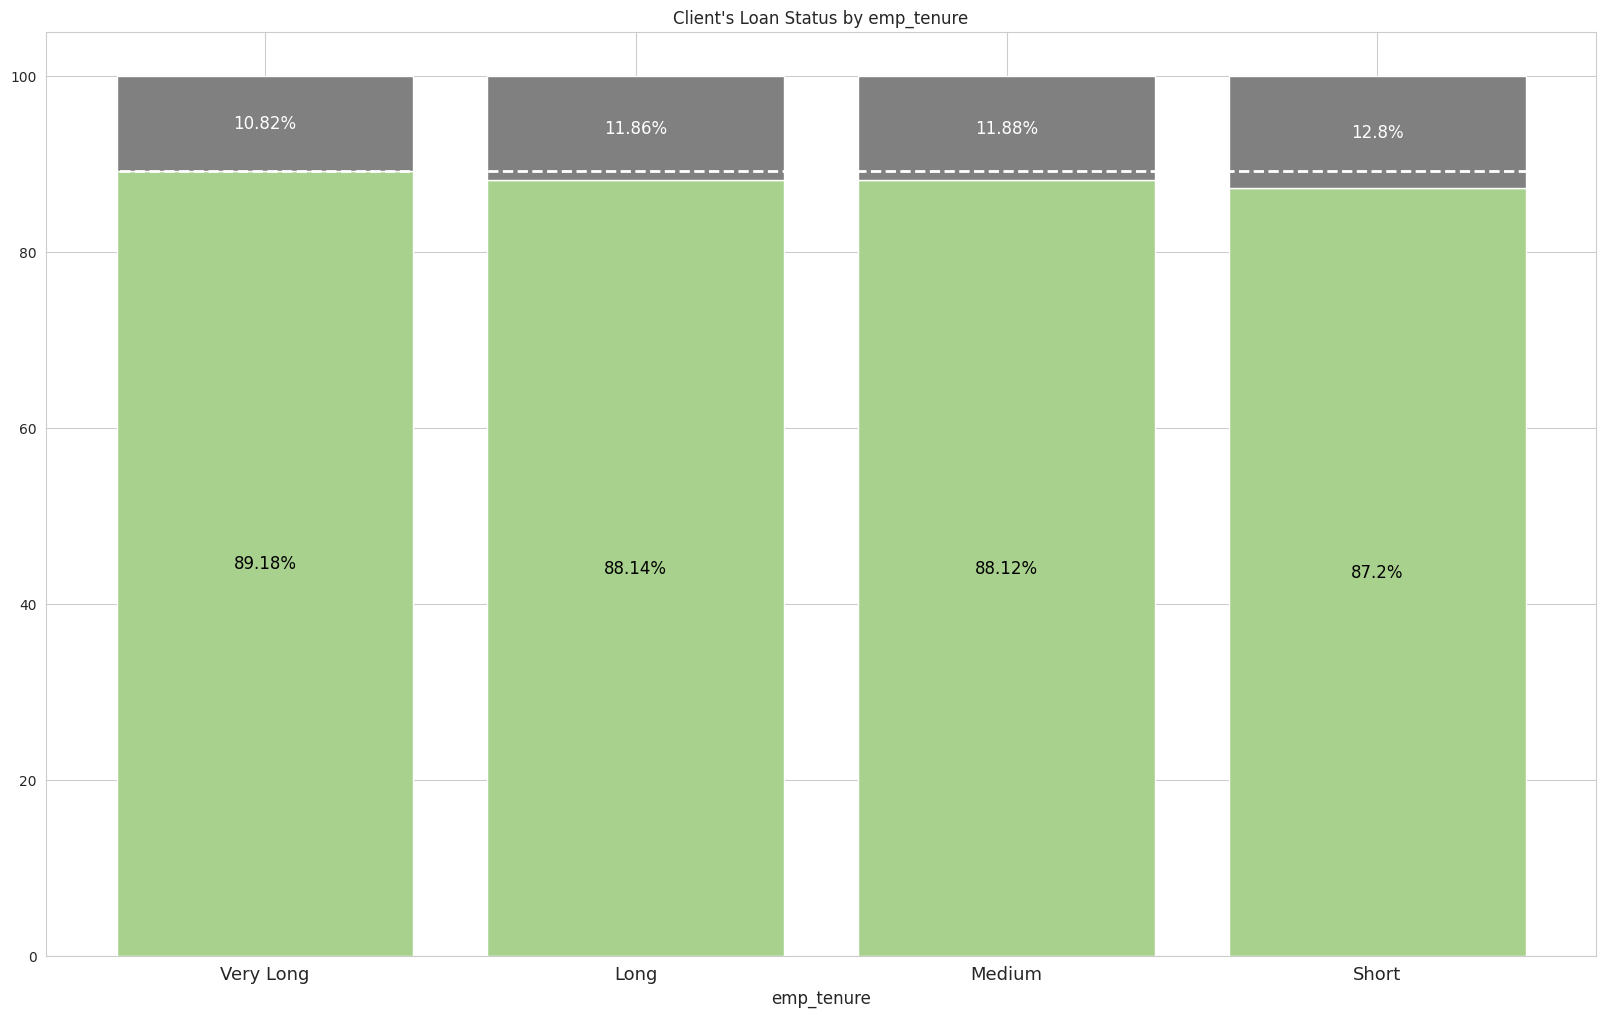

In [51]:
loans_dist_categories('emp_tenure')

# insights
Borrowers with long employment tenure exhibit the highest rate of good loans, approximately 89%, and constitute the largest segment of the client base, accounting for over 32% of the total. This indicates that the majority of the company’s borrowers are likely individuals who have maintained stable employment for more than 10 years. As a result, the company can reasonably expect this group to have the financial capacity to repay their loans.

However, the difference in good loan rates across various employment tenure lengths is relatively minor. This suggests that the duration of a borrower’s employment does not significantly influence their ability to repay loans. This is evident from the fact that borrowers with short, medium, long, or very long tenure show only about a 2% difference in good loan rates, despite representing a smaller proportion of the overall borrower population.

In [52]:
for index, rows in df_loansNew.iterrows():
    if rows['annual_inc'] < 53657:
        df_loansNew.at[index, 'annual_inc_bracket'] = 'Lower Income'
    elif rows['annual_inc'] <= 64923:
        df_loansNew.at[index, 'annual_inc_bracket'] = 'Middle Income'
    else:
        df_loansNew.at[index, 'annual_inc_bracket'] = 'Upper Income'

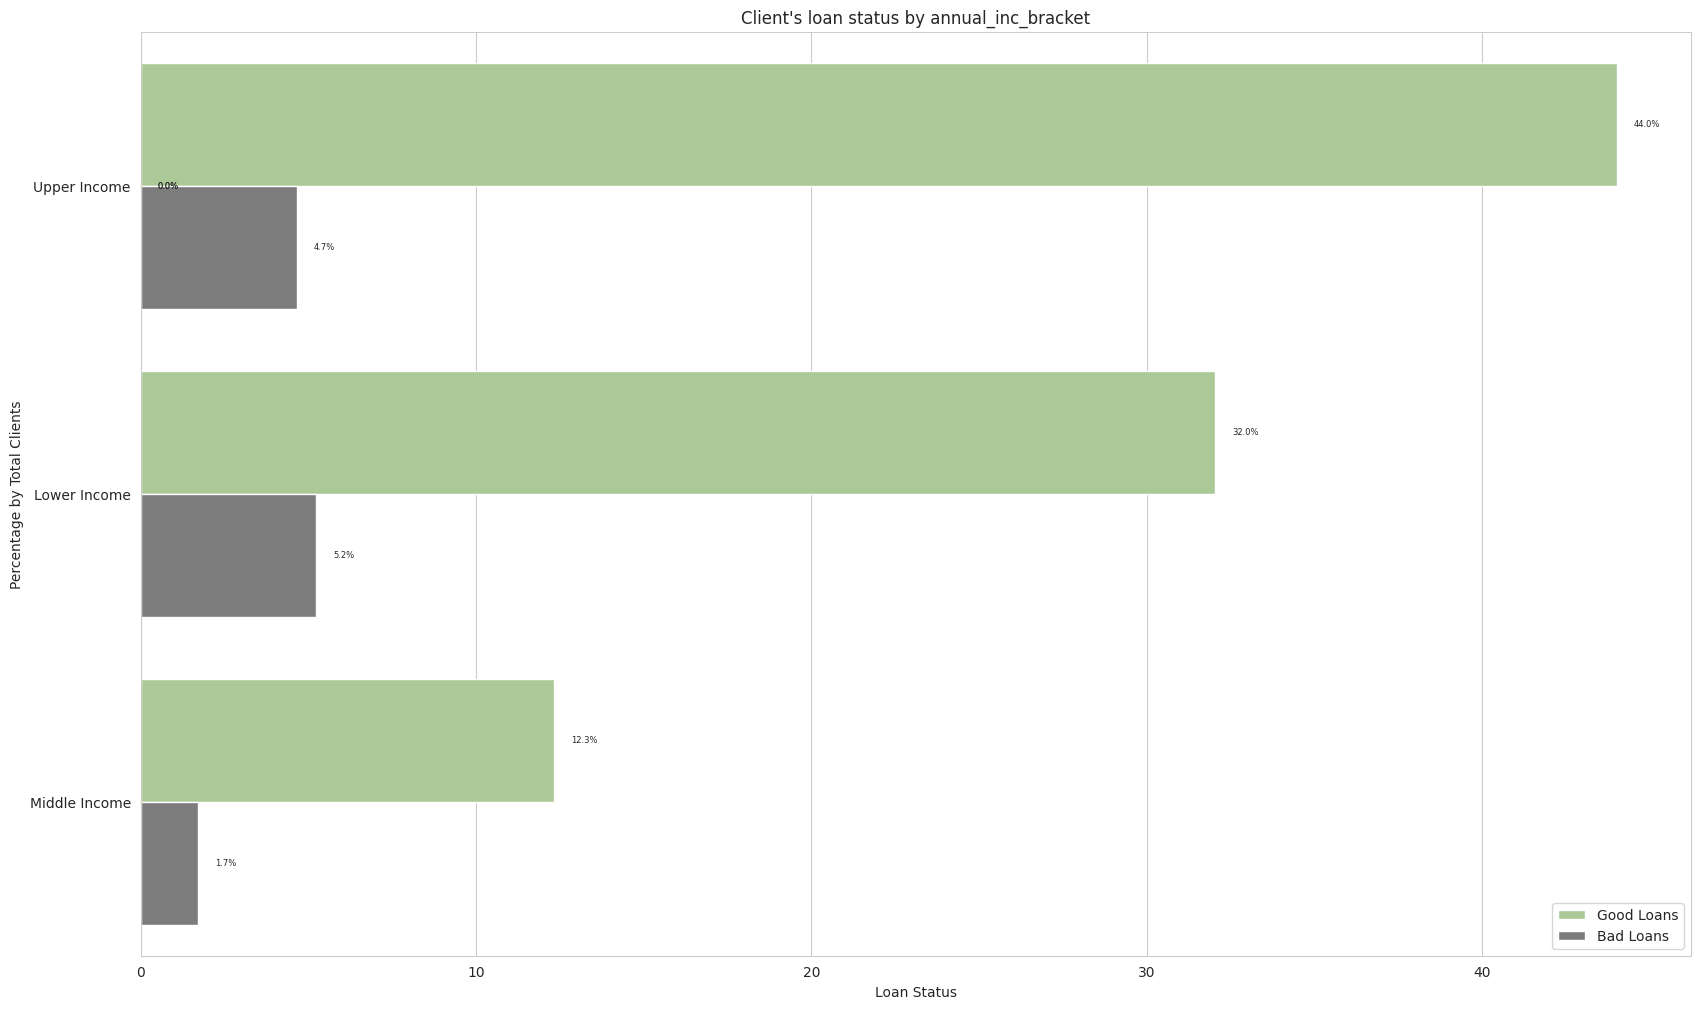

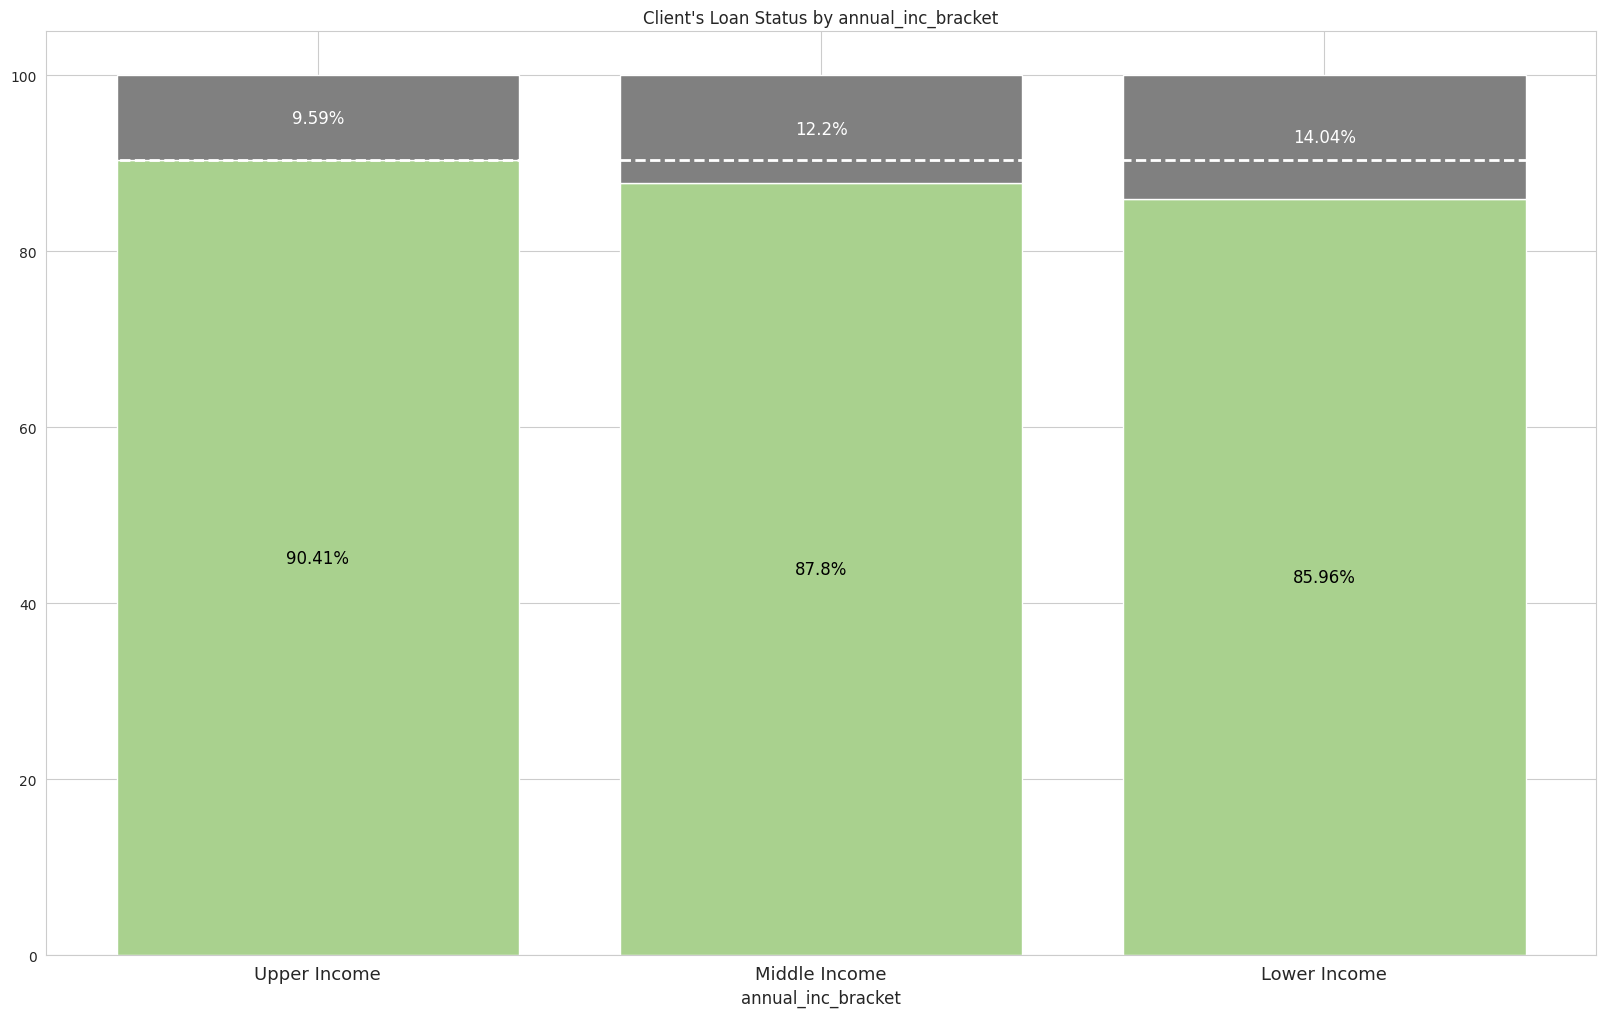

In [53]:
visualize_trend('annual_inc_bracket', 'horizontal', temp_pallete)
loans_dist_categories('annual_inc_bracket')

# insights
There is a clear trend illustrating how a borrower's annual income influences their ability to meet loan obligations. Specifically, each decrease in income bracket is associated with a consistent decline in the rate of successful loans, dropping by approximately 2%.

The majority of borrowers belong to the upper-income bracket, which makes up over 44% of the total borrower base. Within this group, the rate of successful loans is the highest, exceeding 90%, compared to other income brackets. This indicates that a significant portion of the company’s borrowers are likely among the top 10% of household incomes, suggesting they are more capable of fulfilling their loan obligations due to potentially lower financial burdens.
Borrowers from the middle-income bracket, although representing the smallest group, have the second-highest rate of successful loans at over 87%, only slightly more than 2% lower than that of upper-income borrowers. This suggests that middle-income borrowers may be a promising target for future marketing efforts, as they appear to be relatively dependable.

Conversely, borrowers from the lower-income bracket exhibit the lowest rate of successful loans among all income groups, despite being the second-largest cohort, accounting for more than 32% of total borrowers. This indicates that individuals in this income bracket may pose a higher risk, as they are likely to be more sensitive to financial pressures, which could ultimately affect their ability to repay loans. Feel free to ask if you need further adjustments or additional information!

In [54]:
def col_average(num_col):
  if num_col not in df_loansNew.columns:
        raise ValueError(f"Column '{num_col}' not found in DataFrame.")
  col_avg = round(df_loansNew[num_col].mean(),2)

  col_good_avg = round(df_loansNew.loc[df_loansNew['Target'] == 'Good Loans', num_col].mean(), 2)
  col_bad_avg = round(df_loansNew.loc[df_loansNew['Target'] == 'Bad Loans', num_col].mean(), 2)


  return col_avg, col_good_avg, col_bad_avg

In [55]:
def kde_with_average(num_col):
    col_avg, col_good_avg, col_bad_avg = col_average(num_col)

    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_loansNew, x=num_col, hue='Target', palette=temp_pallete, fill=True)

    # Add vertical lines for averages
    for val, color in zip([col_avg, col_good_avg, col_bad_avg], ['black', 'orange', 'red']):
        plt.axvline(val, color=color, linestyle='dashed', alpha=.5)

    plt.title("Debt-to-income Ratio by Loan Status")

    # Use annotation for better placement
    text_str = (f"Average DTI: {col_avg}\n"
                f"Good Loans Avg DTI: {col_good_avg}\n"
                f"Bad Loans Avg DTI: {col_bad_avg}")

    plt.annotate(text_str, xy=(0.7, 0.8), xycoords='axes fraction',
                 bbox=dict(facecolor='w', alpha=0.6, pad=5))

    plt.tight_layout()
    plt.yticks([])
    plt.show()


In [56]:
bins = [0, 10, 20, 30, float('inf')]  # Define bin edges
labels = ['Low DTI', 'Medium DTI', 'High DTI', 'Very High DTI']  # Labels for each bin

df_loansNew['dti_categories'] = pd.cut(df_loansNew['dti'], bins=bins, labels=labels, right=True)

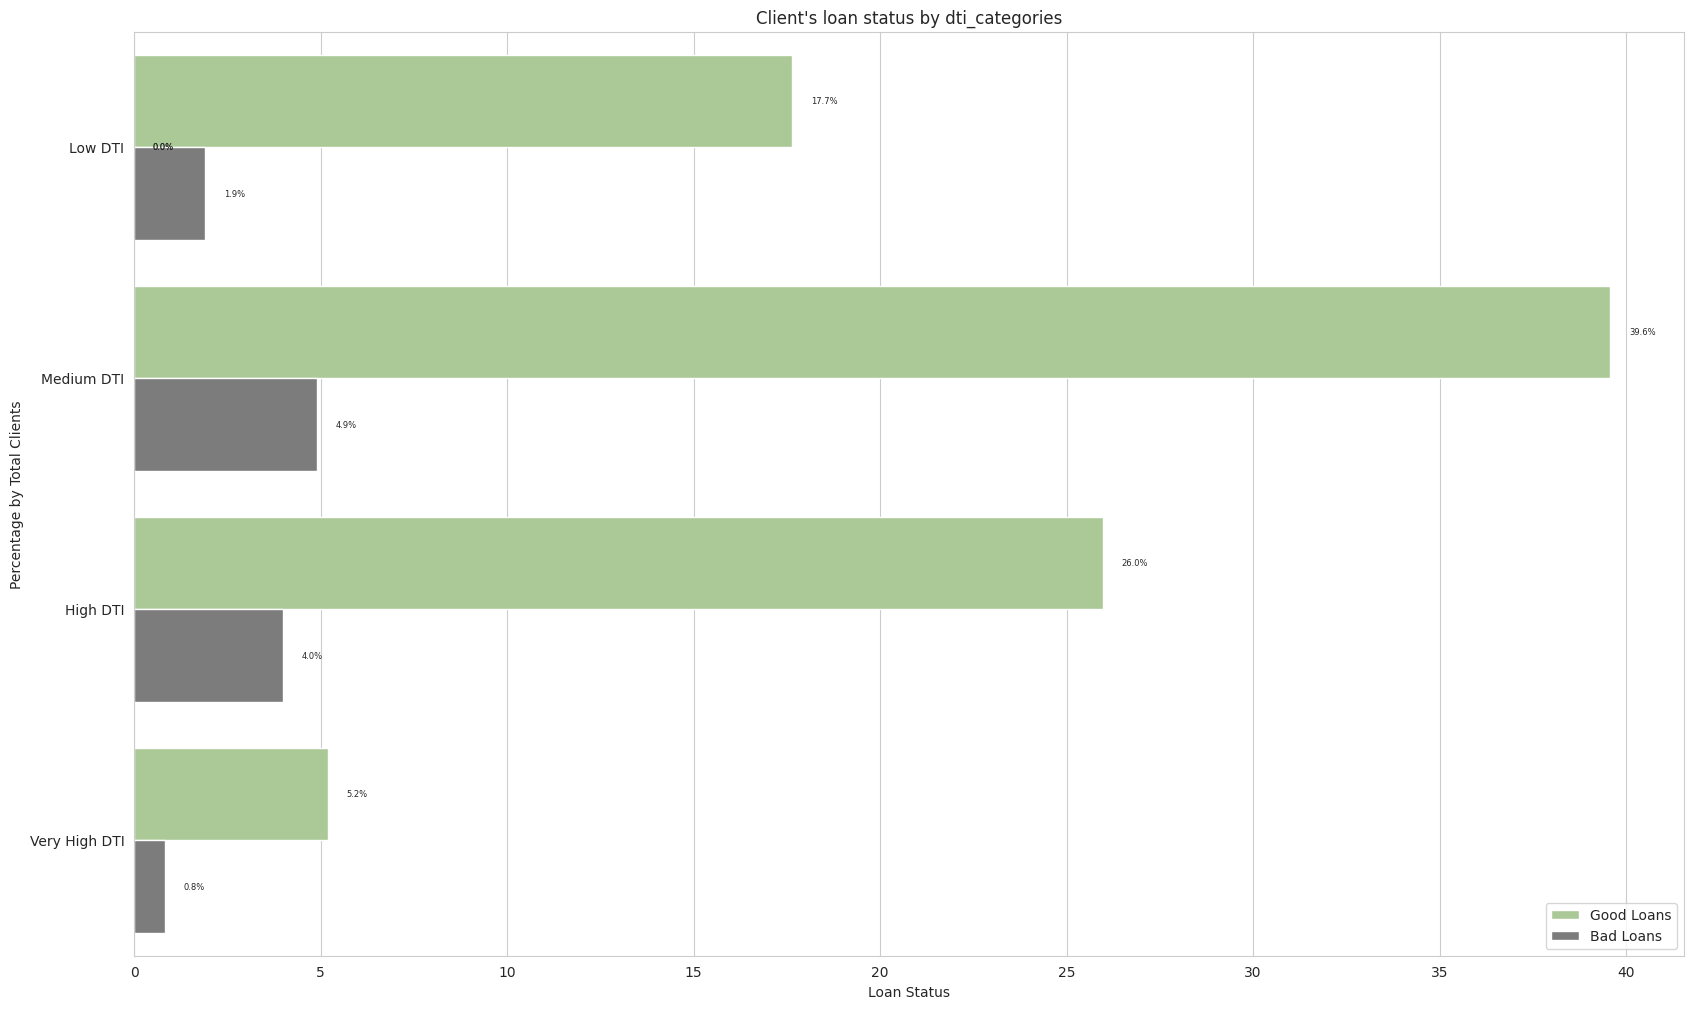

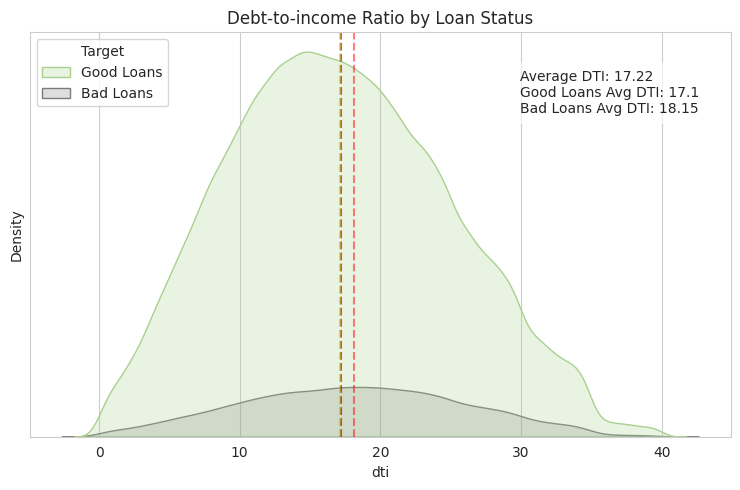

In [57]:
visualize_trend('dti_categories', 'horizontal',temp_pallete)
kde_with_average('dti')

The lower a borrower's debt-to-income ratio, the better their chances of loan approval. According to Investopedia, The maximum acceptable debt-to-income ratio is 43%, though it’s recommended for borrowers to aim for no more than 35%, with anything below 28% being ideal.

# Insights
The average debt-to-income (DTI) ratio for all borrowers is 17.22%, indicating strong creditworthiness. Good loan borrowers typically have a DTI between 10% and 20%, averaging 17.1%, which aligns closely with the overall borrower base. In contrast, bad loan borrowers tend to have a higher DTI of 15% to 25%, averaging 18.15%, highlighting a correlation between increased DTI and a higher risk of loan default.

In [58]:
df_loan_factors = df_loansNew.groupby(['credit_history','annual_inc_bracket','dti_categories']).agg(borr_good_cnt=('Target', lambda x: (x == 'Good Loans').sum())).sort_values('borr_good_cnt', ascending=False)
df_loan_factors.reset_index(inplace=True)

df_loan_factors2 = df_loansNew.groupby(['credit_history','annual_inc_bracket','dti_categories']).agg(borr_bad_cnt=('Target', lambda x: (x == 'Bad Loans').sum())).sort_values('borr_bad_cnt', ascending=False)
df_loan_factors2.reset_index(inplace=True)

df_loan_factors['Loan_Factors'] = df_loan_factors.apply(lambda row: f"{row.iloc[0]} - {row.iloc[1]} - {row.iloc[2]}", axis=1)
df_loan_factors2['Loan_Factors'] = df_loan_factors2.apply(lambda row: f"{row.iloc[0]} - {row.iloc[1]} - {row.iloc[2]}", axis=1)

merged_df = pd.merge(df_loan_factors, df_loan_factors2, on='Loan_Factors', how='outer').sort_values(by=['borr_good_cnt'], ascending=False)

merged_df['percentage_good'] = round(merged_df['borr_good_cnt']/(merged_df['borr_good_cnt']+merged_df['borr_bad_cnt'])*100,2)
merged_df['percentage_bad'] = round(merged_df['borr_bad_cnt']/(merged_df['borr_good_cnt']+merged_df['borr_bad_cnt'])*100,2)

In [59]:
merged_df = merged_df.head(15)
merged_df = merged_df.sort_values('percentage_good', ascending=True)

In [60]:
merged_df

,credit_history_x,annual_inc_bracket_x,dti_categories_x,borr_good_cnt,Loan_Factors,credit_history_y,annual_inc_bracket_y,dti_categories_y,borr_bad_cnt,percentage_good,percentage_bad
12,5+ years,Lower Income,High DTI,51079,5+ years - Lower Income - High DTI,5+ years,Lower Income,High DTI,9070,84.92,15.08
19,5+ years,Middle Income,Very High DTI,3650,5+ years - Middle Income - Very High DTI,5+ years,Middle Income,Very High DTI,630,85.28,14.72
2,2-5 years,Lower Income,Medium DTI,1791,2-5 years - Lower Income - Medium DTI,2-5 years,Lower Income,Medium DTI,301,85.61,14.39
15,5+ years,Lower Income,Very High DTI,12742,5+ years - Lower Income - Very High DTI,5+ years,Lower Income,Very High DTI,2124,85.71,14.29
0,2-5 years,Lower Income,High DTI,1388,2-5 years - Lower Income - High DTI,2-5 years,Lower Income,High DTI,221,86.26,13.74
16,5+ years,Middle Income,High DTI,18781,5+ years - Middle Income - High DTI,5+ years,Middle Income,High DTI,2971,86.34,13.66
14,5+ years,Lower Income,Medium DTI,57490,5+ years - Lower Income - Medium DTI,5+ years,Lower Income,Medium DTI,9065,86.38,13.62
13,5+ years,Lower Income,Low DTI,23435,5+ years - Lower Income - Low DTI,5+ years,Lower Income,Low DTI,3375,87.41,12.59
1,2-5 years,Lower Income,Low DTI,1007,2-5 years - Lower Income - Low DTI,2-5 years,Lower Income,Low DTI,140,87.79,12.21
23,5+ years,Upper Income,Very High DTI,7458,5+ years - Upper Income - Very High DTI,5+ years,Upper Income,Very High DTI,989,88.29,11.71


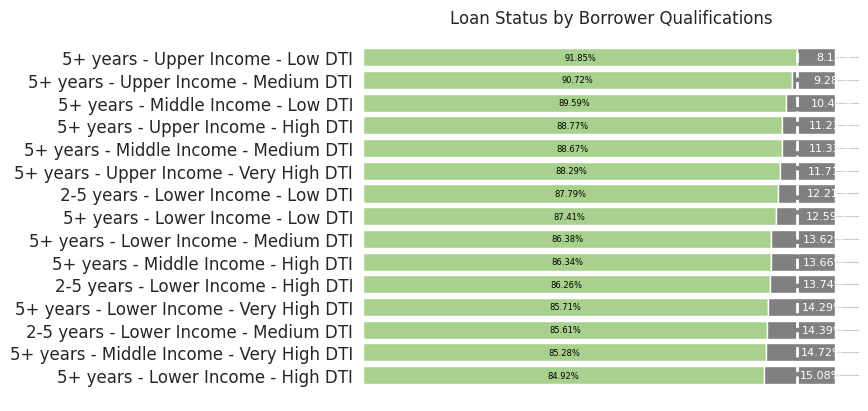

In [61]:
fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax_factors_good = ax.barh(merged_df['Loan_Factors'], merged_df['percentage_good'], color='#A9D18E')
ax_factors_bad = ax.barh(merged_df['Loan_Factors'], merged_df['percentage_bad'], left=merged_df['percentage_good'], color='grey')

for bar in ax_factors_good:
    width = bar.get_width()
    ax.text(
        width / 2, bar.get_y() + bar.get_height() / 2,
        f'{round(width, 2)}%', ha='center', va='center', color='black', fontsize=6
    )

for bar in ax_factors_bad:
    width = bar.get_width()
    ax.text(
        bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
        f'{round(width, 2)}%', ha='left', va='center', color='white', fontsize=8
    )

for spine in ax.spines.values():
    spine.set_visible(False)

max_value = merged_df['percentage_good'].max()

ax.axvline(max_value, color='white', linestyle='--', linewidth=2, label=f'Max Value: {round(max_value, 2)}%')
plt.title('Loan Status by Borrower Qualifications')
plt.xticks([])
ax.tick_params(axis='y', labelsize=12)

# insight
Borrowers with credit histories exceeding 5 years consistently demonstrate high rates of good loans, particularly those in the upper-income bracket with low debt-to-income (DTI) ratios. These qualifications are associated with the highest rates of successful loan repayment, indicating that favorable borrower characteristics strongly correlate with their ability to manage loan obligations effectively.

Income brackets and DTI ratios are interchangeable within their respective categories. Across various borrower qualifications, these two factors often vary, while a credit history of more than 5 years remains constant. Borrowers with these attributes consistently rank among the top five in terms of good loan rates.

Additionally, borrowers with medium credit histories of 2 to 5 years are the only group, aside from those with longer credit histories, to rank highly in terms of good loan rates. Unlike borrowers with longer credit histories, this group is less influenced by income brackets and DTI ratios and primarily consists of individuals with lower incomes.

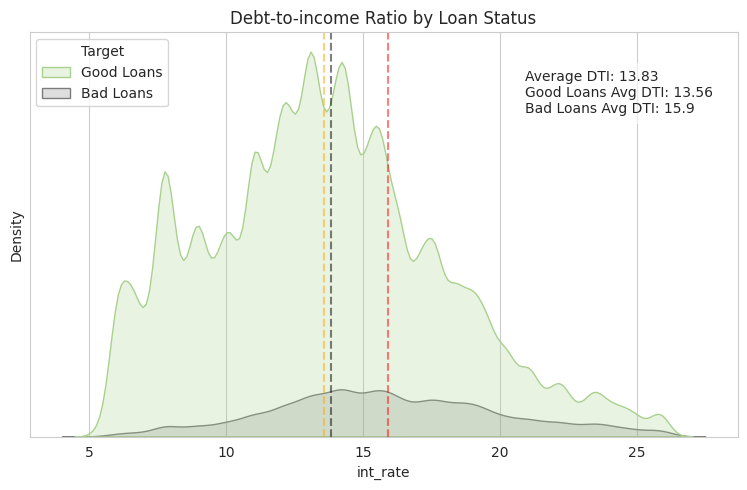

In [62]:
kde_with_average('int_rate')

According to a study by Bankrate.com in 2024, the average interest rate for personal loans is 12.10%. Borrowers with excellent credit scores benefit from the lowest interest rates, ranging from 10.73% to 12.50%. For those with good credit scores, the average rate falls between 13.50% and 15.50%. However, borrowers with lower credit scores face significantly higher rates, which can reach up to 32%.

# insight
The overall average interest rate for all borrowers is 13.83%, which is still considered favorable as it falls within the range of 12.50% to 15.50%. Specifically, borrowers who do not experience repayment difficulties have an average interest rate of 13.54%, while those who face repayment challenges have a higher average rate of 15.9%. This disparity arises because lenders increase interest rates to offset the higher risk associated with borrowers who have lower credit scores.

# Multivariate analysis

In [63]:
# convert target variable to binary
df_loansNew['Target_bool'] = df_loansNew['Target'].map({'Good Loans': 0, 'Bad Loans': 1})

In [64]:
# filter column that has missing values
col_acc = [col for col in df_loansNew.columns if df_loansNew[col].isna().mean()*100 <=5]
df_loansNew2 = df_loansNew[col_acc]

In [65]:
list_col_num = df_loansNew2.select_dtypes(include='number').columns.tolist()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

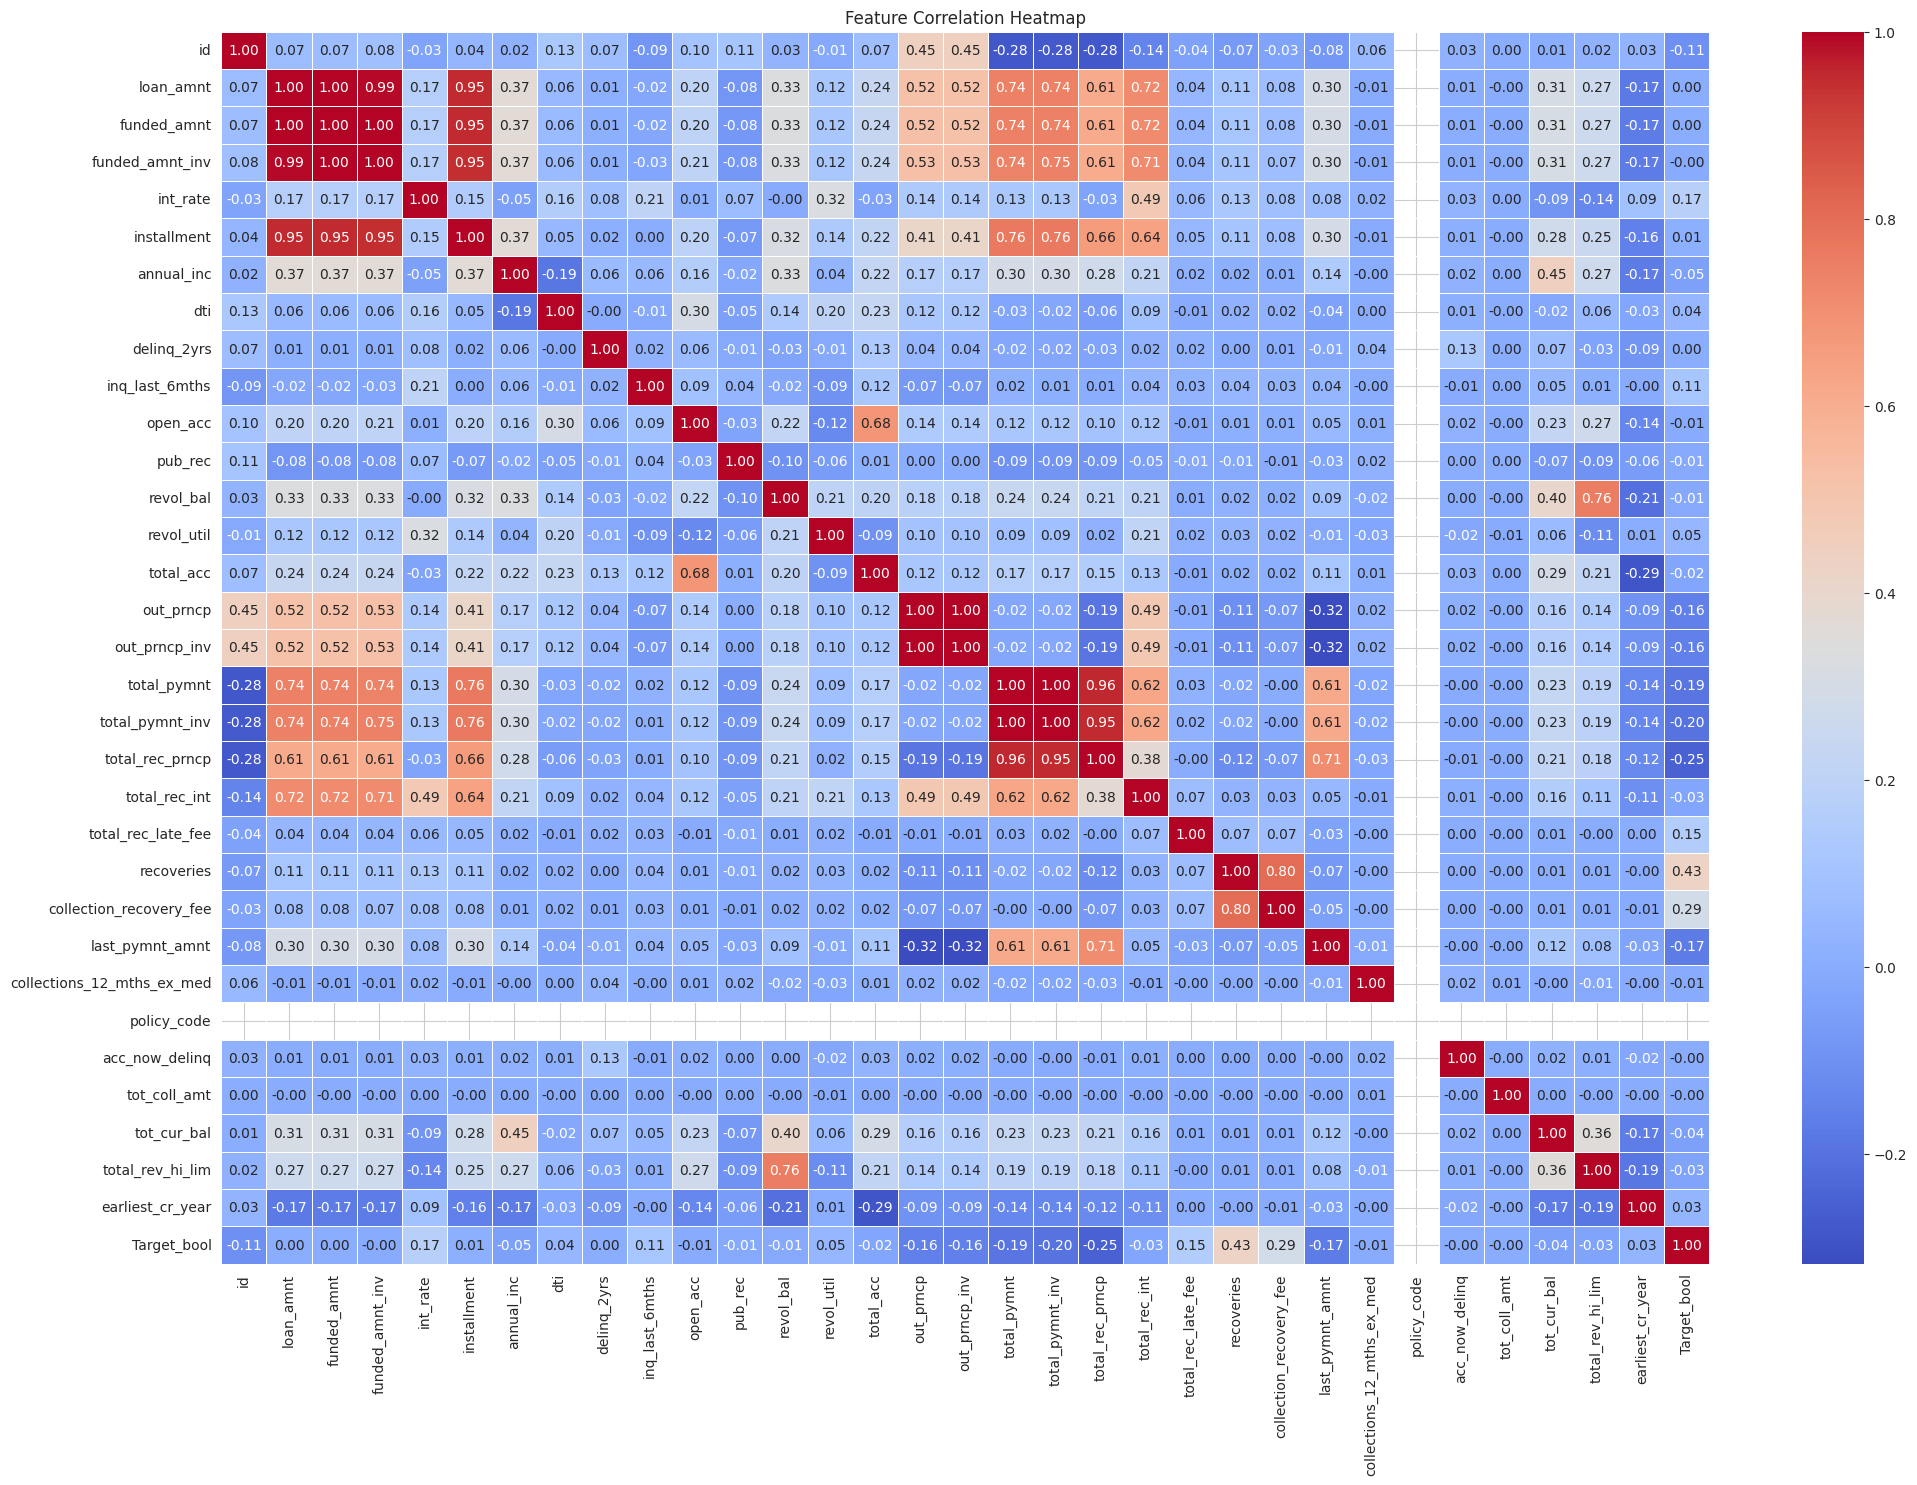

In [66]:
plt.figure(figsize=(24, 16))
corr_mat = df_loansNew2[list_col_num].corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")

# Insights
Payment ability is a key factor in determining loan quality, indicating that borrowers who can meet their payment obligations are more likely to be considered creditworthy. Conversely, higher interest rates negatively impact borrowers' perceived trustworthiness, suggesting that increased rates correlate with a higher likelihood of bad loans. Additionally, recovery rates exhibit a strong negative correlation of -0.43 with loan quality, indicating that lower recovery rates significantly increase the chances of borrowers defaulting or struggling to repay their loans.

# Data preprocessing

## checking for duplicates

In [67]:
df_loans3 = df_loans
df_loans3.duplicated().sum()

0

In [68]:
df_loans3['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


## Checking for missing values

In [69]:
df_loans3['Target'] = df_loans3['loan_status'].apply(lambda x: 1 if x in ['Current','Fully Paid','In Grade Period', 'Does not meet the credit policy. Status:Fully Paid'] else 0)
df_loans3 = df_loans3.drop('loan_status', axis=1)

In [70]:
x = df_loans3.drop('Target', axis=1)
y = df_loans3['Target']

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((373028, 46), (93257, 46), (373028,), (93257,))

In [72]:
# Create missing value percentage dataframes directly
miscol_temp_train = (x_train.isna().mean() * 100).reset_index()
miscol_temp_train.columns = ['Columns', 'Num_train']
miscol_temp_train = miscol_temp_train[miscol_temp_train['Num_train'] > 0]  # Keep only missing columns

miscol_temp_test = (x_test.isna().mean() * 100).reset_index()
miscol_temp_test.columns = ['Columns', 'Num_test']
miscol_temp_test = miscol_temp_test[miscol_temp_test['Num_test'] > 0]  # Keep only missing columns


In [73]:
# merge the two dataset
merged_misval_df = pd.merge(miscol_temp_train, miscol_temp_test, on='Columns', how='inner').sort_values(by=['Num_train'], ascending=False)

filtered_keep = merged_misval_df[merged_misval_df['Num_train']<=10]
filtered_drop = merged_misval_df[merged_misval_df['Num_train']>10]

In [74]:
merged_misval_df['Columns'].value_counts().sum()

0

Since there are no missing values (checking had been performed earlier). We can proceed to next step

In [75]:
cat_listdf = x_train.select_dtypes(include= 'object')

In [76]:
cat_listdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 7440 to 122065
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 373028 non-null  object
 1   grade                373028 non-null  object
 2   sub_grade            373028 non-null  object
 3   emp_title            373028 non-null  object
 4   emp_length           373028 non-null  object
 5   home_ownership       373028 non-null  object
 6   verification_status  373028 non-null  object
 7   issue_d              373028 non-null  object
 8   purpose              373028 non-null  object
 9   title                373028 non-null  object
 10  addr_state           373028 non-null  object
 11  earliest_cr_line     373028 non-null  object
 12  last_pymnt_d         373028 non-null  object
 13  last_credit_pull_d   373028 non-null  object
 14  application_type     373028 non-null  object
dtypes: object(15)
memory usage: 45.5+ MB

In [77]:
cat_listdf['grade'].value_counts()

,count
grade,
B,109455
C,100182
D,61554
A,59863
E,28605
F,10694
G,2675


## dropping irrelavant features

In [78]:
drop_list = ['verification_status',
             'delinq_2yrs',
             'inq_last_6mths',
             'out_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'tot_coll_amt',
             'tot_cur_bal',
             'total_rev_hi_lim']

## feature transformation

### credit history feature

In [79]:
def convert_year_format(date_str):
    if pd.isnull(date_str):
        return date_str
    month_year = date_str.split('-')
    if len(month_year) == 2:
        month = month_year[0]
        year = month_year[1]
        # Convert two-digit year to four-digit year
        if len(year) == 2:
            year = '20' + year if int(year) <= 30 else '19' + year
        return f"{month}-{year}"
    return date_str

In [80]:
earliest_cr_year_train = x_train['earliest_cr_line'].mode()[0]
earliest_cr_year_test = x_test['earliest_cr_line'].mode()[0]

In [81]:
x_train['earliest_cr_line'] = x_train['earliest_cr_line'].fillna(earliest_cr_year_train)
x_test['earliest_cr_line'] = x_test['earliest_cr_line'].fillna(earliest_cr_year_test)

In [82]:
x_train['earliest_cr_line'] = x_train['earliest_cr_line'].apply(convert_year_format)
x_test['earliest_cr_line'] = x_test['earliest_cr_line'].apply(convert_year_format)

In [83]:
x_train['earliest_cr_year'] = pd.to_datetime(x_train['earliest_cr_line'], format='%b-%Y').dt.year.clip(upper=2014)
x_test['earliest_cr_year'] = pd.to_datetime(x_test['earliest_cr_line'], format='%b-%Y').dt.year.clip(upper=2014)

In [84]:
def credit_history_conversion(df):
    for index, rows in df.iterrows():
        credit_history = 2014 - rows['earliest_cr_year']
        if credit_history <= 2:
            df.at[index, 'credit_history'] = '0-2 years'
        elif credit_history <= 5:
            df.at[index, 'credit_history'] = '2-5 years'
        else:
            df.at[index, 'credit_history'] = '+5 years'

In [85]:
credit_history_conversion(x_train)
credit_history_conversion(x_test)

In [86]:
x_train['credit_history'].unique()

array(['+5 years', '2-5 years'], dtype=object)

In [87]:
x_train = x_train.drop(columns=['earliest_cr_line', 'earliest_cr_year'])
x_test = x_test.drop(columns=['earliest_cr_line', 'earliest_cr_year'])

In [88]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 7440 to 122065
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          373028 non-null  int64  
 1   loan_amnt                   373028 non-null  int64  
 2   funded_amnt                 373028 non-null  int64  
 3   funded_amnt_inv             373028 non-null  float64
 4   term                        373028 non-null  object 
 5   int_rate                    373028 non-null  float64
 6   installment                 373028 non-null  float64
 7   grade                       373028 non-null  object 
 8   sub_grade                   373028 non-null  object 
 9   emp_title                   373028 non-null  object 
 10  emp_length                  373028 non-null  object 
 11  home_ownership              373028 non-null  object 
 12  annual_inc                  373028 non-null  float64
 13  verification_sta

## Categorical feature selection

In [89]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373028 entries, 7440 to 122065
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 373028 non-null  object
 1   grade                373028 non-null  object
 2   sub_grade            373028 non-null  object
 3   emp_title            373028 non-null  object
 4   emp_length           373028 non-null  object
 5   home_ownership       373028 non-null  object
 6   verification_status  373028 non-null  object
 7   issue_d              373028 non-null  object
 8   purpose              373028 non-null  object
 9   title                373028 non-null  object
 10  addr_state           373028 non-null  object
 11  last_pymnt_d         373028 non-null  object
 12  last_credit_pull_d   373028 non-null  object
 13  application_type     373028 non-null  object
 14  credit_history       373028 non-null  object
dtypes: object(15)
memory usage: 53.6+ MB

In [90]:
# using chi square test since data doesn't have a normal distribution
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

chi_2 ={
    "Feature": list(x_train_cat.columns),
    "P-value": [round(chi2_contingency(pd.crosstab(y_train, x_train_cat[col]))[1],8) for col in x_train_cat]
}

df_chi_2 = pd.DataFrame(chi_2)

In [91]:
df_chi_2

,Feature,P-value
0,term,0.000000
1,grade,0.000000
2,sub_grade,0.000000
3,emp_title,0.000000
4,emp_length,0.000000
5,home_ownership,0.000000
6,verification_status,0.000000
7,issue_d,0.000000
8,purpose,0.000000
9,title,0.000000


In [92]:

# Assuming x_train_cat is your DataFrame containing categorical features
# Step 1: Create a DataFrame with counts, unique values, top values, and frequencies
cat_unique = pd.DataFrame({
    'Feature': x_train_cat.columns,
    'count': [x_train_cat[col].count() for col in x_train_cat.columns],
    'unique': [x_train_cat[col].nunique() for col in x_train_cat.columns],
    'top': [x_train_cat[col].mode()[0] for col in x_train_cat.columns],
    'freq': [x_train_cat[col].value_counts().max() for col in x_train_cat.columns]
})

# Step 2: Merge with Chi-squared test results
merge_chi_2 = pd.merge(df_chi_2, cat_unique, on='Feature', how='inner')

# Step 3: Sort by p-value and number of unique values
merge_chi_2 = merge_chi_2.sort_values(by=['P-value', 'unique'])

# Display the result
print(merge_chi_2)


                Feature   P-value   count  unique                 top    freq
0                  term  0.000000  373028       2           36 months  270248
6   verification_status  0.000000  373028       3            Verified  134266
5        home_ownership  0.000000  373028       6            MORTGAGE  188482
1                 grade  0.000000  373028       7                   B  109455
4            emp_length  0.000000  373028      11           10+ years  136710
8               purpose  0.000000  373028      14  debt_consolidation  219270
2             sub_grade  0.000000  373028      35                  B3   25365
10           addr_state  0.000000  373028      50                  CA   57178
7               issue_d  0.000000  373028      91              Oct-14   30896
11         last_pymnt_d  0.000000  373028      98              Jan-16  144139
12   last_credit_pull_d  0.000000  373028     103              Jan-16  262280
9                 title  0.000000  373028   52217  Debt consolid

- dropping emp_title, title, last_credit_pull_d, addr_state, issue_d, and last_pymnt_d since they have high cardinality
- drop application_type since it has only one unique value

In [93]:
drop_list2 = ['addr_state',
              'issue_d',
              'last_pymnt_d',
              'last_credit_pull_d',
              'title',
              'emp_title',
              'application_type']

In [94]:
x_train = x_train.drop(columns=drop_list2)
x_test = x_test.drop(columns=drop_list2)

selected_cat_list = x_train.select_dtypes(include='object').columns.to_list()

In [95]:
print(selected_cat_list)

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'credit_history']


## Numerical feature selection

In [96]:
x_train_num = x_train.select_dtypes(exclude= 'object')
x_train_num.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [97]:
# Using ANOVA for numerical features
# it is use to Identify which numerical features significantly impact a categorical target.
from sklearn.feature_selection import f_classif


F_values, p_values = f_classif(x_train_num, y_train)

anova_results = pd.DataFrame({'Feature': x_train_num.columns, 'F-Value': F_values, 'p-Value': p_values.round(5)})


In [98]:
anova_results.shape

(31, 3)

In [99]:
print(anova_results)

                       Feature       F-Value  p-Value
0                           id   2606.420415  0.00000
1                    loan_amnt    102.097409  0.00000
2                  funded_amnt     93.661514  0.00000
3              funded_amnt_inv     57.147526  0.00000
4                     int_rate  12345.651231  0.00000
5                  installment    130.978690  0.00000
6                   annual_inc    835.619384  0.00000
7                          dti    954.645633  0.00000
8                  delinq_2yrs     12.594792  0.00039
9               inq_last_6mths   1924.709485  0.00000
10                    open_acc      5.727706  0.01670
11                     pub_rec     15.105277  0.00010
12                   revol_bal    156.349049  0.00000
13                  revol_util   1128.052302  0.00000
14                   total_acc    174.956163  0.00000
15                   out_prncp   6459.450655  0.00000
16               out_prncp_inv   6458.119907  0.00000
17                 total_pym

In [100]:
# filter column that has p-value < 0.05
temp_anova = anova_results[anova_results['p-Value'] < 0.05]['Feature'].tolist()
print(f'excluded columns: {len(anova_results) - len(temp_anova)}')

temp_anova

excluded columns: 3


['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'tot_cur_bal',
 'total_rev_hi_lim']

- 3 features are dropped owing to their higher p-value

<Axes: >

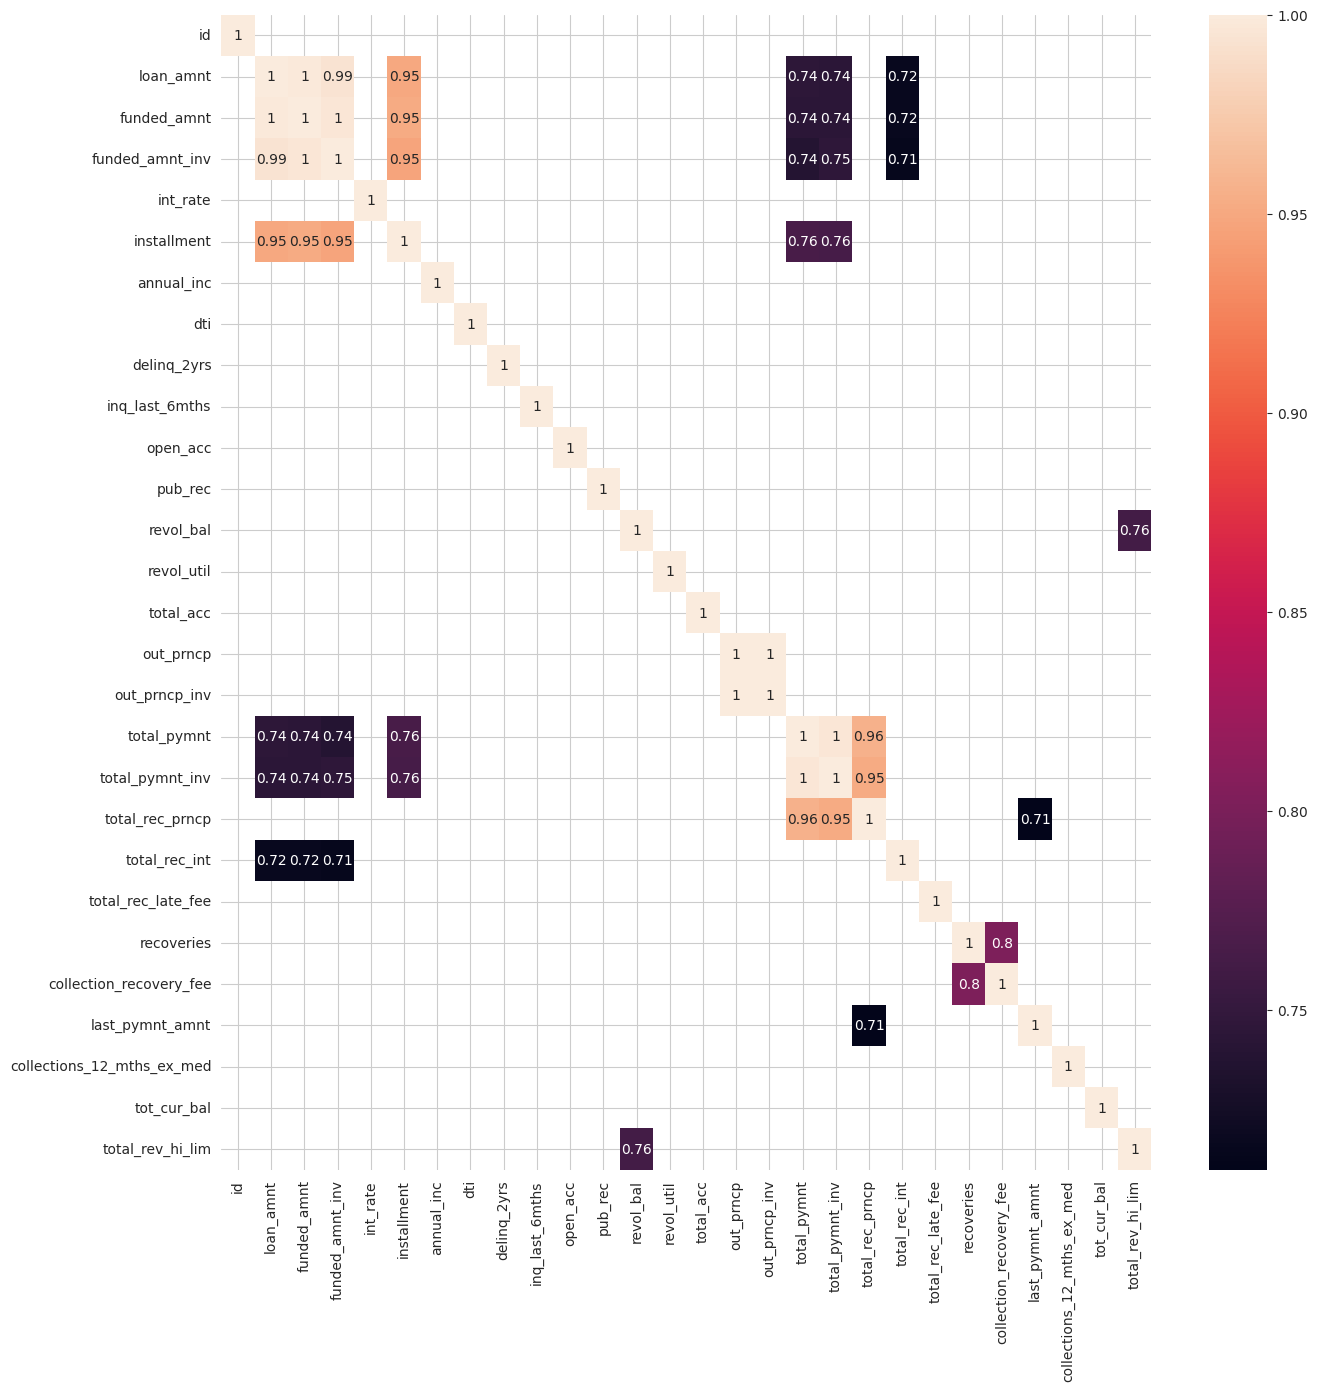

In [101]:
# create heatmap to show correlation between features
corr = x_train[temp_anova].corr()
plt.figure(figsize=(15, 15))

sns.heatmap(corr, annot=True, mask=(abs(corr)<=0.7))

In [102]:
selected_cat_corr = temp_anova
selected_features = selected_cat_corr + selected_cat_list

x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [103]:
features= pd.DataFrame(selected_features, columns=['Feature'])


In [104]:
print(features)

                       Feature
0                           id
1                    loan_amnt
2                  funded_amnt
3              funded_amnt_inv
4                     int_rate
5                  installment
6                   annual_inc
7                          dti
8                  delinq_2yrs
9               inq_last_6mths
10                    open_acc
11                     pub_rec
12                   revol_bal
13                  revol_util
14                   total_acc
15                   out_prncp
16               out_prncp_inv
17                 total_pymnt
18             total_pymnt_inv
19             total_rec_prncp
20               total_rec_int
21          total_rec_late_fee
22                  recoveries
23     collection_recovery_fee
24             last_pymnt_amnt
25  collections_12_mths_ex_med
26                 tot_cur_bal
27            total_rev_hi_lim
28                        term
29                       grade
30                   sub_grade
31      

In [105]:
x_train.shape, x_test.shape

((373028, 36), (93257, 36))

# feature engineering

## Encoding

### one-hot encoding
- encoding categorical columns to convert them into numerical value with 0 and 1

In [106]:
x_train.select_dtypes(include='object').describe().T

,count,unique,top,freq
term,373028,2,36 months,270248
grade,373028,7,B,109455
sub_grade,373028,35,B3,25365
emp_length,373028,11,10+ years,136710
home_ownership,373028,6,MORTGAGE,188482
verification_status,373028,3,Verified,134266
purpose,373028,14,debt_consolidation,219270
credit_history,373028,2,+5 years,367017


In [107]:
columns_to_encode = x_train.select_dtypes(include='object').columns
# dropping grade and sub_grade owing to their ordinal values
columns_to_encode = columns_to_encode.drop(['grade', 'sub_grade'])

In [108]:
columns_to_encode

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'credit_history'],
      dtype='object')

In [109]:
from sklearn.preprocessing import OneHotEncoder

x_train_to_encode = x_train[columns_to_encode]
x_train_rest = x_train.drop(columns= columns_to_encode)

x_test_to_encode = x_test[columns_to_encode]
x_test_rest = x_test.drop(columns= columns_to_encode)

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_data_train = encoder.fit_transform(x_train_to_encode).toarray()
encoded_data_test = encoder.transform(x_test_to_encode).toarray()

encoded_columns= encoder.get_feature_names_out(columns_to_encode)

x_train_encoded = pd.DataFrame(encoded_data_train, columns=encoded_columns, index=x_train.index)
x_test_encoded = pd.DataFrame(encoded_data_test, columns=encoded_columns, index=x_test.index)

x_train_final = pd.concat([x_train_rest.reset_index(drop=True), x_train_encoded.reset_index(drop=True)], axis=1)
x_test_final = pd.concat([x_test_rest.reset_index(drop=True), x_test_encoded.reset_index(drop=True)], axis=1)



In [110]:
x_train_final.shape, x_test_final.shape

((373028, 62), (93257, 62))

In [111]:
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 62 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   373028 non-null  int64  
 1   loan_amnt                            373028 non-null  int64  
 2   funded_amnt                          373028 non-null  int64  
 3   funded_amnt_inv                      373028 non-null  float64
 4   int_rate                             373028 non-null  float64
 5   installment                          373028 non-null  float64
 6   annual_inc                           373028 non-null  float64
 7   dti                                  373028 non-null  float64
 8   delinq_2yrs                          373028 non-null  float64
 9   inq_last_6mths                       373028 non-null  float64
 10  open_acc                             373028 non-null  float64
 11  pub_rec      

### Label encoder
- label encoder will be used to encode grade and sub_grade owing to their ordinal values

In [112]:
def merged_df_grade(df1,df2,col):
    df_merge_grp = df1[col].value_counts().reset_index()
    df_merge_grp.columns = [col, 'cust_cnt_train']

    df_merge_grp2 = df2[col].value_counts().reset_index()
    df_merge_grp2.columns = [col, 'cust_cnt_test']

    merged_df = pd.merge(df_merge_grp, df_merge_grp2, on=col, how='outer').sort_values(by='cust_cnt_train', ascending=False)

    return merged_df

In [113]:
df_grade = merged_df_grade(x_train_final, x_test_final, 'grade')
df_sub_grade = merged_df_grade(x_train_final, x_test_final, 'sub_grade')

In [114]:
df_grade.sort_values(by='grade', ascending=True)

,grade,cust_cnt_train,cust_cnt_test
0,A,59863,15004
1,B,109455,27474
2,C,100182,25111
3,D,61554,15334
4,E,28605,7152
5,F,10694,2535
6,G,2675,647


In [115]:
df_sub_grade.sort_values(by='sub_grade', ascending=True)

,sub_grade,cust_cnt_train,cust_cnt_test
0,A1,8513,2028
1,A2,8741,2215
2,A3,10053,2515
3,A4,15170,3875
4,A5,17386,4371
5,B1,18296,4580
6,B2,21265,5345
7,B3,25365,6321
8,B4,24443,6062
9,B5,20086,5166


In [116]:
label_encoder = LabelEncoder()

x_train_final['grade_encoded'] = label_encoder.fit_transform(x_train_final['grade'])
x_test_final['grade_encoded'] = label_encoder.transform(x_test_final['grade'])

x_train_final['sub_grade_encoded'] = label_encoder.fit_transform(x_train_final['sub_grade'])
x_test_final['sub_grade_encoded'] = label_encoder.transform(x_test_final['sub_grade'])

x_train_final = x_train_final.drop(columns=['grade', 'sub_grade'])
x_test_final = x_test_final.drop(columns=['grade', 'sub_grade'])

In [117]:
df_grade = merged_df_grade(x_train_final, x_test_final, 'grade_encoded')
df_sub_grade = merged_df_grade(x_train_final, x_test_final, 'sub_grade_encoded')

In [118]:
df_grade.sort_values(by='grade_encoded', ascending=True)

,grade_encoded,cust_cnt_train,cust_cnt_test
0,0,59863,15004
1,1,109455,27474
2,2,100182,25111
3,3,61554,15334
4,4,28605,7152
5,5,10694,2535
6,6,2675,647


In [119]:
df_sub_grade.sort_values(by='sub_grade_encoded', ascending=True)

,sub_grade_encoded,cust_cnt_train,cust_cnt_test
0,0,8513,2028
1,1,8741,2215
2,2,10053,2515
3,3,15170,3875
4,4,17386,4371
5,5,18296,4580
6,6,21265,5345
7,7,25365,6321
8,8,24443,6062
9,9,20086,5166


In [120]:
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373028 entries, 0 to 373027
Data columns (total 62 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   373028 non-null  int64  
 1   loan_amnt                            373028 non-null  int64  
 2   funded_amnt                          373028 non-null  int64  
 3   funded_amnt_inv                      373028 non-null  float64
 4   int_rate                             373028 non-null  float64
 5   installment                          373028 non-null  float64
 6   annual_inc                           373028 non-null  float64
 7   dti                                  373028 non-null  float64
 8   delinq_2yrs                          373028 non-null  float64
 9   inq_last_6mths                       373028 non-null  float64
 10  open_acc                             373028 non-null  float64
 11  pub_rec      

## Handling Outliers

In [121]:
df_outlier_train = pd.DataFrame(columns= ['Features', 'train_upper_oulier'])
df_outlier_test= pd.DataFrame(columns= ['Features', 'test_upper_oulier'])


In [122]:
def outlier_percentage(series):
  q1, q3 = np.percentile(series, [25,75])
  iqr = q3 - q1
  upper_bound, lower_bound = q3 + 1.5*iqr, q1 - 1.5*iqr

  return np.mean((series > upper_bound) | (series < lower_bound)) * 100

In [123]:
def outliers(df):
  outlier_df = pd.DataFrame([
        {"Features": col, "Outlier Percentage": outlier_percentage(df[col])}
        for col in df.select_dtypes(exclude='bool').columns
    ])
    # Sort by Outlier Percentage
  return outlier_df.sort_values(by="Outlier Percentage", ascending=False).reset_index(drop=True)


In [124]:
train_outliers = outliers(x_train_final)
test_outliers = outliers(x_test_final)

In [125]:
def get_binary_columns(df):
    return [col for col in df.columns if df[col].isin([0, 1]).all()]

# Function to identify numerical columns based on selected features
def get_numerical_columns(df, binary_cols, selected_features):
    return [col for col in df.columns if col not in binary_cols and col in selected_features]

In [126]:
binary_columns = get_binary_columns(x_train_final)
numerical_columns = get_numerical_columns(x_train_final, binary_columns, selected_features)

# Merge outliers and filter results
merged_outlier_df = pd.merge(train_outliers, test_outliers, on='Features', how='inner')
merged_outlier_df = merged_outlier_df.sort_values(by='Outlier Percentage_x', ascending=False)
merged_outlier_df = merged_outlier_df[
    merged_outlier_df['Features'].isin(numerical_columns) & (merged_outlier_df['Outlier Percentage_y'] > 0)
]

# Round off values for better readability
merged_outlier_df = merged_outlier_df.round(2)

In [127]:
merged_outlier_df

,Features,Outlier Percentage_x,Outlier Percentage_y
1,delinq_2yrs,17.92,17.68
2,last_pymnt_amnt,15.11,15.01
3,pub_rec,13.16,13.19
6,inq_last_6mths,7.90,7.83
9,total_rev_hi_lim,7.07,6.98
10,total_rec_int,6.67,6.74
16,recoveries,5.24,5.18
18,out_prncp_inv,5.00,5.07
19,out_prncp,4.99,5.07
20,collection_recovery_fee,4.99,4.92


In [128]:
# normalize and reduce effect of outliers using logarithmic transformation
x_train_final[numerical_columns] = x_train_final[numerical_columns].apply(lambda x: np.log1p(x))
x_test_final[numerical_columns] = x_test_final[numerical_columns].apply(lambda x: np.log1p(x))


In [129]:
train_outliers_transformed = outliers(x_train_final)
test_outliers_transformed = outliers(x_test_final)

In [130]:
# Function to merge and filter outliers
def merge_and_filter_outliers(train_df, test_df, numerical_cols, threshold):
    # Merge the two DataFrames on 'Features'
    merged_df = pd.merge(train_df, test_df, on='Features', how='inner')

    # Sort by Outlier Percentage from training data
    merged_df = merged_df.sort_values(by='Outlier Percentage_x', ascending=False)

    # Filter based on numerical columns and outlier percentage threshold
    filtered_df = merged_df[
        merged_df['Features'].isin(numerical_cols) & (merged_df['Outlier Percentage_y'] > threshold)
    ]

    return filtered_df

In [131]:
merged_outlier_df_scaled = merge_and_filter_outliers(
    train_outliers_transformed,
    test_outliers_transformed,
    numerical_columns,
    threshold=5
)

In [132]:
merged_outlier_df_scaled.round(2)

,Features,Outlier Percentage_x,Outlier Percentage_y
1,delinq_2yrs,17.92,17.68
2,pub_rec,13.16,13.19
12,revol_util,5.25,5.12
13,recoveries,5.24,5.18


4 features left with outliers after using log transformation

outliers of the remaining features will be normalized using winsorization

winsorization is used to limit extreme values in the dataset by replacing them with the nearest values within a specified percentile range.

In [133]:
from scipy.stats.mstats import winsorize

for col in merged_outlier_df_scaled['Features']:
    x_train_final[col] = winsorize(x_train_final[col], limits=[0.25, 0.25])
    x_test_final[col] = winsorize(x_test_final[col], limits=[0.25, 0.25])

In [134]:
percent_outlier_transformed = pd.DataFrame(columns=['Features','Train_outlier_percentages','Test_outlier_percentages'])

In [135]:
merged_outlier_df_scaled_1 = merged_outlier_df_scaled.copy()
def calculate_outliers(row):
    train_outlier_val = row['Outlier Percentage_x']
    test_outlier_val = row['Outlier Percentage_y']

    train_count = (x_train_final[row['Features']] > train_outlier_val).sum()
    test_count = (x_test_final[row['Features']] > test_outlier_val).sum()

    train_percentage = round(train_count / len(x_train_final) * 100, 2)
    test_percentage = round(test_count / len(x_test_final) * 100, 2)

    return pd.Series([row['Features'], train_percentage, test_percentage], index=['Features', 'Train_outliers', 'Test_outliers'])


In [136]:
# Apply the function across the DataFrame and filter results
outliers_results = merged_outlier_df_scaled.apply(calculate_outliers, axis=1)
outliers_results.columns = ['Features', 'Train_outliers', 'Test_outliers']

In [137]:
# Filter out rows where both percentages are greater than zero
perc_outlier_transformed = outliers_results[(outliers_results['Train_outliers'] > 0) & (outliers_results['Test_outliers'] > 0)]

In [138]:
# Sort the resulting DataFrame
perc_outlier_transformed.sort_values('Train_outliers', ascending=False, inplace=True)
perc_outlier_transformed

,Features,Train_outliers,Test_outliers


By applying winsorization with the limits set at the 25th and 75th percentiles, any values that fall below the 25th percentile will be replaced with the value at the 25th percentile, while any values exceeding the 75th percentile will be replaced with the value at the 75th percentile.

# SMOTE
SMOTE is an oversampling method that assists to enchance machine learning models performance by evening the class distribution, specifically useful when minority variables are underrepresented

SMOTE generates synthetic examples for the minority class by interpolating between existing instances of that class.

In [140]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.4 MB/s eta 0:00:00


In [141]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state =2, sampling_strategy=0.75)

x_train_smote, y_train_smote = smt.fit_resample(x_train_final, y_train)

In [142]:
x_train_smote.shape, x_train_final.shape, y_train_smote.shape, y_train.shape, y_test.shape, x_test_final.shape

((575333, 62), (373028, 62), (575333,), (373028,), (93257,), (93257, 62))

In [143]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00


# Modelling

### without SMOTE

In [144]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# 📌 Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Trains the model, predicts probabilities, and computes AUC, accuracy, & recall."""
    model.fit(X_train, y_train)

    # Handle probability predictions differently for Linear SVC
    if isinstance(model, LinearSVC):
        y_train_proba = model.decision_function(X_train)
        y_test_proba = model.decision_function(X_test)
    else:
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

    # Compute AUC scores
    train_auc = roc_auc_score(y_train, y_train_proba).round(4)
    test_auc = roc_auc_score(y_test, y_test_proba).round(2)

    print(f'{model.__class__.__name__} AUC train: {train_auc}')
    print(f'{model.__class__.__name__} AUC test: {test_auc}')

    # Compute classification report, accuracy, and recall
    accuracy, recall = generate_class_report(y_test_proba, y_test)

    return model.__class__.__name__, test_auc, accuracy, recall

# 📌 Function to generate classification report, confusion matrix, accuracy & recall
def generate_class_report(y_proba, y_true):
    """Converts probabilities to class labels, prints accuracy, recall, confusion matrix."""
    y_pred_class = (y_proba > 0.5).astype(int)

    # Compute accuracy
    accuracy = accuracy_score(y_true, y_pred_class)

    # Classification report
    report = classification_report(y_true, y_pred_class, output_dict=True)
    recall = report['1']['recall']  # Extract recall for positive class

    print(classification_report(y_true, y_pred_class))
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_class), '\n')

    return accuracy, recall

In [145]:
# 📌 Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=2),
    'Decision Tree': DecisionTreeClassifier(random_state=2),
    'Linear SVC': LinearSVC(random_state=2),
    'Random Forest': RandomForestClassifier(random_state=2),
    'CatBoost': CatBoostClassifier(random_seed=2, verbose=False)
}


In [153]:
# 📌 Evaluate all models and store results
results = [evaluate_model(model, x_train_final, x_test_final, y_train, y_test) for model in models.values()]

# 📌 Convert results into a DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'AUC_vanilla', 'Accuracy', 'Recall'])

LogisticRegression AUC train: 0.9553
LogisticRegression AUC test: 0.96
              precision    recall  f1-score   support

           0       0.98      0.76      0.85     11066
           1       0.97      1.00      0.98     82191

    accuracy                           0.97     93257
   macro avg       0.97      0.88      0.92     93257
weighted avg       0.97      0.97      0.97     93257

Accuracy: 0.9694
Confusion Matrix:
 [[ 8381  2685]
 [  167 82024]] 

DecisionTreeClassifier AUC train: 1.0
DecisionTreeClassifier AUC test: 0.92
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     11066
           1       0.98      0.98      0.98     82191

    accuracy                           0.96     93257
   macro avg       0.91      0.92      0.91     93257
weighted avg       0.96      0.96      0.96     93257

Accuracy: 0.9640
Confusion Matrix:
 [[ 9418  1648]
 [ 1709 80482]] 

LinearSVC AUC train: 0.9594
LinearSVC AUC test: 0.96
        

Recall will be used to evaluate the model's effectiveness in accurately identifying all positive instances (1), specifically borrowers who are likely to result in good loans. Precision will also be considered, as it assesses the model's ability to avoid misclassifying bad loans (0) as good loans (1). Misidentifying potential bad loans can be more costly than losing revenue from good loans.

The evaluation metrics show a minimal gap between positive instances (1) and negative instances (0), indicating either low variance in the dataset or potential bias in the models. To investigate this, we will test a balanced sample of data to determine if performance improves.

## With SMOTE

Classification models are still remained the same with default parameters as well

In [148]:
results_SMOTE = [evaluate_model(model, x_train_smote, x_test_final, y_train_smote, y_test) for model in models.values()]

metrics_df_smote = pd.DataFrame(results_SMOTE, columns=['Model', 'AUC_vanilla', 'Accuracy', 'Recall'])

LogisticRegression AUC train: 0.9643
LogisticRegression AUC test: 0.96
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     11066
           1       0.98      0.97      0.98     82191

    accuracy                           0.96     93257
   macro avg       0.89      0.91      0.90     93257
weighted avg       0.96      0.96      0.96     93257

Accuracy: 0.9573
Confusion Matrix:
 [[ 9299  1767]
 [ 2219 79972]] 

DecisionTreeClassifier AUC train: 1.0
DecisionTreeClassifier AUC test: 0.9
              precision    recall  f1-score   support

           0       0.76      0.83      0.79     11066
           1       0.98      0.97      0.97     82191

    accuracy                           0.95     93257
   macro avg       0.87      0.90      0.88     93257
weighted avg       0.95      0.95      0.95     93257

Accuracy: 0.9491
Confusion Matrix:
 [[ 9173  1893]
 [ 2856 79335]] 

LinearSVC AUC train: 0.9718
LinearSVC AUC test: 0.97
         

# Notes

## AUC
AUC : performance measurement or metric used to evaluate the performance of classification models.


A higher AUC value signifies improved class separation, meaning the model is more effective at distinguishing between positive and negative classes.
- An AUC greater than 0.8 is typically regarded as good performance.
- An AUC above 0.9 is seen as very good performance.
- An AUC below 0.5 suggests that the model performs no better than random chance.

## confusion matrix
A confusion matrix is a table used to evaluate the performance of a classification model in machine learning. It compares the model’s predictions against the actual outcomes, providing a detailed breakdown of correct and incorrect classifications.


To maximize revenue from predictions, it's important to focus on true positives (correctly identified borrowers with good loans) and minimize false negatives (borrowers incorrectly marked as bad loans), while also reducing false positives (borrowers wrongly identified as good loans). This approach helps prevent losses from paying customers and increases the chances of converting non-paying customers into paying ones.


# Insight
On average, the five models demonstrate a high accuracy of 95%–98% in identifying borrowers with good loans (1). The top performers—Logistic Regression, Random Forest, and CatBoost—show the best overall results, excelling at distinguishing between good (1) and bad loans (0), with an average AUC score of 98% on test data.

All models, except Linear SVC, have recall scores above 0.90, indicating they effectively identify a significant portion of borrowers with good loan status. The Random Forest and CatBoost models achieve the highest recall, ensuring minimal false negatives. Additionally, these leading models attain high F1-scores for the positive class (1), reflecting a strong balance between precision and recall.

Overall, the models maintain a consistent accuracy of around 96%, with CatBoost achieving the highest at 97.99%. The true positive to false negative ratio for the best models suggests they can identify paying customers (TP) nearly 4.8 times more often than they miss them (FN), highlighting their potential to capture revenue while minimizing losses.


# Model performance

In [155]:
print(metrics_df.head())

                    Model  AUC_vanilla  Accuracy    Recall
0      LogisticRegression         0.96  0.969418  0.997968
1  DecisionTreeClassifier         0.92  0.964003  0.979207
2               LinearSVC         0.96  0.969579  0.987845
3  RandomForestClassifier         0.98  0.974833  0.999513
4      CatBoostClassifier         0.99  0.979444  0.997725


In [156]:
print(metrics_df_smote.head())

                    Model  AUC_vanilla  Accuracy    Recall
0      LogisticRegression         0.96  0.957258  0.973002
1  DecisionTreeClassifier         0.90  0.949076  0.965252
2               LinearSVC         0.97  0.825386  0.810515
3  RandomForestClassifier         0.98  0.975069  0.998248
4      CatBoostClassifier         0.99  0.979894  0.997275


In [161]:
recall_df = metrics_df[['Model', 'Recall']].rename(columns={'Recall': 'Recall_Original'})
recall_df_smote = metrics_df_smote[['Model', 'Recall']].rename(columns={'Recall': 'Recall_SMOTE'})

model_order = ['Logistic Regression', 'Decision Tree', 'Linear SVC', 'Random Forest', 'Catboost']

model_order = ['Logistic Regression', 'Decision Tree', 'Linear SVC', 'Random Forest', 'Catboost']

merged_recall = pd.merge(recall_df, recall_df_smote, on='Model', how='outer')

merged_recall['Model'] = pd.Categorical(merged_recall['Model'], categories=model_order, ordered=True)


merged_recall = merged_recall.sort_values('Model')
merged_recall

,Model,Recall_Original,Recall_SMOTE
0,NaN,0.997725,0.997275
1,NaN,0.979207,0.965252
2,NaN,0.987845,0.810515
3,NaN,0.997968,0.973002
4,NaN,0.999513,0.998248


## Notes

# Hypertuning

Based on precision, recall, and accuracy, the top three models selected for hyperparameter tuning are Logistic Regression, Random Forest, and CatBoost.



In [158]:
from sklearn.model_selection import RandomizedSearchCV
import time

def class_report_train(y_proba, y_true):
    y_pred_class = [1 if val > 0.5 else 0 for val in y_proba]
    report = classification_report(y_true, y_pred_class, output_dict=True)
    return report['1']['recall']

def train_model(model_name, model_used, param_grid, X_train_smote, y_train_smote, X_test_final, y_test):

    # Start parameter search
    start_time_search = time.time()
    param_search = RandomizedSearchCV(model_used, param_grid, cv=3, random_state=2)
    param_search.fit(X_train_smote, y_train_smote)

    best_params = param_search.best_params_
    best_model = model_used.__class__(**best_params)

    end_time_search = time.time()
    total_runtime_search = end_time_search - start_time_search

    # Fit the best model
    start_time_fit = time.time()
    best_model.fit(X_train_smote, y_train_smote)

    # Get predictions
    y_pred_proba_train_hyp = best_model.predict_proba(X_train_smote)[:, 1]
    y_pred_proba_test_hyp = best_model.predict_proba(X_test_final)[:, 1]

    end_time_fit = time.time()
    total_runtime_fit = end_time_fit - start_time_fit

    # Calculate AUC scores
    train_AUC_hyp = roc_auc_score(y_true=y_train_smote, y_score=y_pred_proba_train_hyp).round(4)
    test_AUC_hyp = roc_auc_score(y_true=y_test, y_score=y_pred_proba_test_hyp).round(2)

    # Get recall scores
    recall_score_hyp_train = class_report_train(y_pred_proba_train_hyp, y_train_smote)
    recall_score_hyp_test = class_report_train(y_pred_proba_test_hyp, y_test)

    return {
        'Model': model_name,
        'Parameter Search Runtime': round(total_runtime_search, 2),
        'Model Runtime': round(total_runtime_fit, 2),
        'Recall Train': round(recall_score_hyp_train, 3),
        'Recall Test': round(recall_score_hyp_test, 3),
        'Train AUC': train_AUC_hyp,
        'Test AUC': test_AUC_hyp,
        'Best Params': best_params
    }

In [162]:
List_param = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'class_weight': [None, 'balanced']
    },
    {
        'max_depth': [5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    {
        'iterations': [10, 20],
        'depth': [6, 8, 10],
        'l2_leaf_reg': [1, 3, 5],
        'bagging_temperature': [0.5, 1, 2]
    }
]

# Define machine learning models
ml_model_hyp = {
    'Logistic Regression': LogisticRegression(random_state=2),
    'Random Forest': RandomForestClassifier(random_state=2, n_jobs=10),
    'Catboost': CatBoostClassifier(random_seed=2, verbose=False)
}

# Initialize an empty DataFrame to store performance metrics
hyper_performance = pd.DataFrame(columns=['Model', 'Parameter Search Runtime',
                                          'Model Runtime', 'Recall Train',
                                          'Recall Test'])

# Iterate over each model and its corresponding parameters
for i, (model_name, model_used) in enumerate(ml_model_hyp.items()):
    results = train_model(model_name, model_used, List_param[i],
                          x_train_smote, y_train_smote,
                          x_test_final, y_test)

    # Append results to the performance DataFrame
    hyper_performance = pd.concat([hyper_performance, pd.DataFrame([results])], ignore_index=True)

print(hyper_performance)

KeyboardInterrupt: 